In [ ]:
import pandas as pd

# 1. Clean maintenance data
maintenance = pd.read_csv('D:/DataRun/Data/maintenance_order.csv')
maintenance_clean = maintenance.drop_duplicates()

# 2. Load other files
production = pd.read_csv('D:/DataRun/Data/production_logs.csv')
cross_ref = pd.read_csv('D:/DataRun/Data/cross_reference.csv')

# 4. Merge
df = production
df.info()
df.describe(include='all')
# 5. Add features
# df['HAS_MAINTENANCE'] = df['ORDER'].notna().astype(int)

# print(f"Final shape: {df.shape}")

# # 6. Format dates to yyyy-mm-dd
# df['PRODUCTIONDATE_DAY_LOC'] = df['PRODUCTIONDATE_DAY_LOC'].dt.strftime('%Y-%m-%d')
# df['BASIC_START_DATE'] = df['BASIC_START_DATE'].dt.strftime('%Y-%m-%d')

# # Remove duplicate rows
# df = df.drop_duplicates()

# print(f"Shape after removing duplicates: {df.shape}")
# # # Export to Excel
# # df.to_excel(r"d:\DataRun\Data\merged_production_maintenance.xlsx", index=False)
# # print("Data exported to merged_production_maintenance.xlsx successfully!")


# # Đếm số ngày khác nhau trong cột PRODUCTIONDATE_DAY_LOC
# unique_days = df['PRODUCTIONDATE_DAY_LOC'].nunique()

# print(f"Số ngày khác nhau trong file: {unique_days}")

# # Hiển thị các ngày đầu tiên để kiểm tra
# print(f"\nVí dụ các ngày đầu tiên:")
# print(df['PRODUCTIONDATE_DAY_LOC'].unique()[:10])

# # Thống kê thêm
# print(f"\nTổng số dòng dữ liệu: {len(df)}")
# print(f"Ngày đầu tiên: {df['PRODUCTIONDATE_DAY_LOC'].min()}")
# print(f"Ngày cuối cùng: {df['PRODUCTIONDATE_DAY_LOC'].max()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167946 entries, 0 to 167945
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRODUCTIONDATE_DAY_LOC     167946 non-null  object 
 1   SHIFT_NAME                 167946 non-null  object 
 2   LINE_NAME                  167946 non-null  object 
 3   CO_TYPE                    145176 non-null  object 
 4   CREW_ID                    167787 non-null  object 
 5   AE_MODEL_CATEGORY          148392 non-null  object 
 6   SIZE_TYPE                  104949 non-null  object 
 7   SHIFT_NAME.1               167946 non-null  object 
 8   UTIL_REASON_DESCRIPTION    148392 non-null  object 
 9   DOWNTIME                   167946 non-null  int64  
 10  EFFECTIVE_RUNTIME          104949 non-null  float64
 11  GOOD_PRODUCTION_QTY        167946 non-null  int64  
 12  LUNCH_AND_BREAK            167946 non-null  int64  
 13  MEETING_AND_TRAINING       16

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,AE_MODEL_CATEGORY,SIZE_TYPE,SHIFT_NAME.1,UTIL_REASON_DESCRIPTION,DOWNTIME,...,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE
count,167946,167946,167946,145176,167787,148392,104949,167946,148392,167946.000000,...,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.0,104949.000000
unique,181,3,53,4,3,4,32,3,525,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-02-20,Day-1,MKBC0202,Material_Handle,C,Plant Decision,Total Defense Shield,Day-1,Running,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1278,56851,4530,73758,57143,61424,17095,56851,20173,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.572720,...,48.985317,43.061591,41.412597,0.684952,1.812386,27.400212,1.186893,82.252152,0.0,77.033820
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.749306,...,116.081637,132.031162,117.098792,8.527059,5.487821,110.828209,15.107859,150.241160,0.0,41.525277
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,20.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,60.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.0,78.900000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,...,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.0,81.400000


In [ ]:
# Remove duplicate SHIFT_NAME column
df = df.drop(columns=['SHIFT_NAME.1'])

In [ ]:
# Chuyển đổi cột PRODUCTIONDATE_DAY_LOC sang kiểu datetime
df['PRODUCTIONDATE_DAY_LOC'] = pd.to_datetime(df['PRODUCTIONDATE_DAY_LOC'])

# Sắp xếp dataframe theo ngày
df = df.sort_values('PRODUCTIONDATE_DAY_LOC')

# Hiển thị thông tin sau khi sắp xếp
print(f"Ngày đầu tiên sau khi sắp xếp: {df['PRODUCTIONDATE_DAY_LOC'].min()}")
print(f"Ngày cuối cùng sau khi sắp xếp: {df['PRODUCTIONDATE_DAY_LOC'].max()}")
print(f"\nDữ liệu đã được sắp xếp theo thứ tự thời gian:")
print(df[['PRODUCTIONDATE_DAY_LOC', 'LINE_NAME', 'SHIFT_NAME']].head(10))

Ngày đầu tiên sau khi sắp xếp: 2025-01-01 00:00:00
Ngày cuối cùng sau khi sắp xếp: 2025-06-30 00:00:00

Dữ liệu đã được sắp xếp theo thứ tự thời gian:
       PRODUCTIONDATE_DAY_LOC LINE_NAME   SHIFT_NAME
144140             2025-01-01  MKBC0101      Night-3
118110             2025-01-01  MKBC1301      Night-3
43394              2025-01-01  MHPT2302  Afternoon-2
113354             2025-01-01  MHPT2307        Day-1
67265              2025-01-01  MHPT2303        Day-1
80663              2025-01-01  MKZA1701  Afternoon-2
110566             2025-01-01  MKBC1002        Day-1
46933              2025-01-01  MKBC0302        Day-1
116248             2025-01-01  MKFX2102  Afternoon-2
22827              2025-01-01  MKBC1101        Day-1


In [ ]:
# Tính OEE metrics cho 3 trường hợp
# Tính lại Performance = EFFECTIVE_RUNTIME / RUN_TIME
# Tạo cột tháng để nhóm theo tháng
df['MONTH'] = df['PRODUCTIONDATE_DAY_LOC'].dt.to_period('M')

# TH1: Tính theo từng ngày
daily_metrics = df.groupby('PRODUCTIONDATE_DAY_LOC').agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

daily_metrics['Availability'] = daily_metrics['RUN_TIME'] / daily_metrics['PRODUCTION_AVAILABLE_TIME']
daily_metrics['Performance'] = daily_metrics['EFFECTIVE_RUNTIME'] / daily_metrics['RUN_TIME']
daily_metrics['Quality'] = daily_metrics['GOOD_PRODUCTION_QTY'] / (daily_metrics['GOOD_PRODUCTION_QTY'] + daily_metrics['REJECT_PRODUCTION_QTY'])
daily_metrics['OEE'] = daily_metrics['Availability'] * daily_metrics['Performance'] * daily_metrics['Quality']

print("=== TH1: Metrics theo ngày ===")
print(daily_metrics[['PRODUCTIONDATE_DAY_LOC', 'Availability', 'Performance', 'Quality', 'OEE']].head(10))

# TH2: Tính theo từng tháng
monthly_metrics = df.groupby('MONTH').agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

monthly_metrics['Availability'] = monthly_metrics['RUN_TIME'] / monthly_metrics['PRODUCTION_AVAILABLE_TIME']
monthly_metrics['Performance'] = monthly_metrics['EFFECTIVE_RUNTIME'] / monthly_metrics['RUN_TIME']
monthly_metrics['Quality'] = monthly_metrics['GOOD_PRODUCTION_QTY'] / (monthly_metrics['GOOD_PRODUCTION_QTY'] + monthly_metrics['REJECT_PRODUCTION_QTY'])
monthly_metrics['OEE'] = monthly_metrics['Availability'] * monthly_metrics['Performance'] * monthly_metrics['Quality']

print("\n=== TH2: Metrics theo tháng ===")
print(monthly_metrics[['MONTH', 'Availability', 'Performance', 'Quality', 'OEE']])

# TH3: Tính cho toàn bộ dữ liệu
total_run_time = df['RUN_TIME'].sum()
total_production_available_time = df['PRODUCTION_AVAILABLE_TIME'].sum()
total_good_qty = df['GOOD_PRODUCTION_QTY'].sum()
total_reject_qty = df['REJECT_PRODUCTION_QTY'].sum()
total_effective_runtime = df['EFFECTIVE_RUNTIME'].sum()
avg_production_order_rate = df['PRODUCTION_ORDER_RATE'].mean()

overall_availability = total_run_time / total_production_available_time
overall_performance = total_effective_runtime / total_run_time
overall_quality = total_good_qty / (total_good_qty + total_reject_qty)
overall_oee = overall_availability * overall_performance * overall_quality

print("\n=== TH3: Metrics cho toàn bộ dữ liệu ===")
print(f"Availability: {overall_availability:.4f}")
print(f"Performance: {overall_performance:.4f}")
print(f"Quality: {overall_quality:.4f}")
print(f"OEE: {overall_oee:.4f}")

# Tính thêm DR và PTY cho TH1: theo ngày
daily_metrics['TOTAL_PRODUCTION'] = daily_metrics['GOOD_PRODUCTION_QTY'] + daily_metrics['REJECT_PRODUCTION_QTY']
daily_metrics['DR'] = daily_metrics['REJECT_PRODUCTION_QTY'] / daily_metrics['TOTAL_PRODUCTION']
daily_metrics['PTY'] = daily_metrics['GOOD_PRODUCTION_QTY'] / daily_metrics['PRODUCTION_AVAILABLE_TIME']

print("\n=== TH1: DR và PTY theo ngày ===")
print(daily_metrics[['PRODUCTIONDATE_DAY_LOC', 'DR', 'PTY']].head(10))

# Tính thêm DR và PTY cho TH2: theo tháng
monthly_metrics['TOTAL_PRODUCTION'] = monthly_metrics['GOOD_PRODUCTION_QTY'] + monthly_metrics['REJECT_PRODUCTION_QTY']
monthly_metrics['DR'] = monthly_metrics['REJECT_PRODUCTION_QTY'] / monthly_metrics['TOTAL_PRODUCTION']
monthly_metrics['PTY'] = monthly_metrics['GOOD_PRODUCTION_QTY'] / monthly_metrics['PRODUCTION_AVAILABLE_TIME']

print("\n=== TH2: DR và PTY theo tháng ===")
print(monthly_metrics[['MONTH', 'DR', 'PTY']])

# Tính thêm DR và PTY cho TH3: toàn bộ dữ liệu
total_production = total_good_qty + total_reject_qty
overall_dr = total_reject_qty / total_production
overall_pty = total_good_qty / total_production_available_time

print("\n=== TH3: DR và PTY cho toàn bộ dữ liệu ===")
print(f"DR (Defect Rate): {overall_dr:.4f}")
print(f"PTY (Productivity): {overall_pty:.4f}")

# Lưu các metrics ra file CSV
daily_metrics.to_csv('daily_metrics.csv', index=False)
monthly_metrics.to_csv('monthly_metrics.csv', index=False)

# Lưu overall metrics ra file CSV
overall_metrics_df = pd.DataFrame({
    'Metric': ['Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY'],
    'Value': [overall_availability, overall_performance, overall_quality, overall_oee, overall_dr, overall_pty]
})
overall_metrics_df.to_csv('overall_metrics.csv', index=False)

print("✓ Đã lưu daily_metrics.csv")
print("✓ Đã lưu monthly_metrics.csv")
print("✓ Đã lưu overall_metrics.csv")

=== TH1: Metrics theo ngày ===
  PRODUCTIONDATE_DAY_LOC  Availability  Performance   Quality       OEE
0             2025-01-01           NaN          NaN       NaN       NaN
1             2025-01-02      0.847111     0.989682  0.982149  0.823404
2             2025-01-03      0.846789     0.988908  0.982321  0.822592
3             2025-01-04      0.853517     0.990846  0.983614  0.831845
4             2025-01-05      0.868432     0.993843  0.985011  0.850149
5             2025-01-06      0.836476     0.990913  0.983489  0.815189
6             2025-01-07      0.827282     0.988905  0.983303  0.804443
7             2025-01-08      0.836994     0.986898  0.983581  0.812466
8             2025-01-09      0.806882     0.987601  0.983366  0.783622
9             2025-01-10      0.821651     0.991754  0.983271  0.801243

=== TH2: Metrics theo tháng ===
     MONTH  Availability  Performance   Quality       OEE
0  2025-01      0.837979     0.990822  0.983326  0.816444
1  2025-02      0.818812    

In [ ]:
# Tính OEE metrics phân loại theo SIZE_TYPE

# Lọc dữ liệu có SIZE_TYPE không null
df_with_size = df[df['SIZE_TYPE'].notna()].copy()

# TH1: Tính theo SIZE_TYPE và ngày
size_daily_metrics = df_with_size.groupby(['SIZE_TYPE', 'PRODUCTIONDATE_DAY_LOC']).agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

size_daily_metrics['Availability'] = size_daily_metrics['RUN_TIME'] / size_daily_metrics['PRODUCTION_AVAILABLE_TIME']
size_daily_metrics['Performance'] = size_daily_metrics['EFFECTIVE_RUNTIME'] / size_daily_metrics['RUN_TIME']
size_daily_metrics['Quality'] = size_daily_metrics['GOOD_PRODUCTION_QTY'] / (size_daily_metrics['GOOD_PRODUCTION_QTY'] + size_daily_metrics['REJECT_PRODUCTION_QTY'])
size_daily_metrics['OEE'] = size_daily_metrics['Availability'] * size_daily_metrics['Performance'] * size_daily_metrics['Quality']
size_daily_metrics['TOTAL_PRODUCTION'] = size_daily_metrics['GOOD_PRODUCTION_QTY'] + size_daily_metrics['REJECT_PRODUCTION_QTY']
size_daily_metrics['DR'] = size_daily_metrics['REJECT_PRODUCTION_QTY'] / size_daily_metrics['TOTAL_PRODUCTION']
size_daily_metrics['PTY'] = size_daily_metrics['GOOD_PRODUCTION_QTY'] / size_daily_metrics['PRODUCTION_AVAILABLE_TIME']

print("=== TH1: Metrics theo SIZE_TYPE và ngày ===")
print(size_daily_metrics[['SIZE_TYPE', 'PRODUCTIONDATE_DAY_LOC', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']].head(20))

# TH2: Tính theo SIZE_TYPE và tháng
size_monthly_metrics = df_with_size.groupby(['SIZE_TYPE', 'MONTH']).agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

size_monthly_metrics['Availability'] = size_monthly_metrics['RUN_TIME'] / size_monthly_metrics['PRODUCTION_AVAILABLE_TIME']
size_monthly_metrics['Performance'] = size_monthly_metrics['EFFECTIVE_RUNTIME'] / size_monthly_metrics['RUN_TIME']
size_monthly_metrics['Quality'] = size_monthly_metrics['GOOD_PRODUCTION_QTY'] / (size_monthly_metrics['GOOD_PRODUCTION_QTY'] + size_monthly_metrics['REJECT_PRODUCTION_QTY'])
size_monthly_metrics['OEE'] = size_monthly_metrics['Availability'] * size_monthly_metrics['Performance'] * size_monthly_metrics['Quality']
size_monthly_metrics['TOTAL_PRODUCTION'] = size_monthly_metrics['GOOD_PRODUCTION_QTY'] + size_monthly_metrics['REJECT_PRODUCTION_QTY']
size_monthly_metrics['DR'] = size_monthly_metrics['REJECT_PRODUCTION_QTY'] / size_monthly_metrics['TOTAL_PRODUCTION']
size_monthly_metrics['PTY'] = size_monthly_metrics['GOOD_PRODUCTION_QTY'] / size_monthly_metrics['PRODUCTION_AVAILABLE_TIME']

print("\n=== TH2: Metrics theo SIZE_TYPE và tháng ===")
print(size_monthly_metrics[['SIZE_TYPE', 'MONTH', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']])

# TH3: Tính cho toàn bộ dữ liệu theo từng SIZE_TYPE
size_overall_metrics = df_with_size.groupby('SIZE_TYPE').agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

size_overall_metrics['Availability'] = size_overall_metrics['RUN_TIME'] / size_overall_metrics['PRODUCTION_AVAILABLE_TIME']
size_overall_metrics['Performance'] = size_overall_metrics['EFFECTIVE_RUNTIME'] / size_overall_metrics['RUN_TIME']
size_overall_metrics['Quality'] = size_overall_metrics['GOOD_PRODUCTION_QTY'] / (size_overall_metrics['GOOD_PRODUCTION_QTY'] + size_overall_metrics['REJECT_PRODUCTION_QTY'])
size_overall_metrics['OEE'] = size_overall_metrics['Availability'] * size_overall_metrics['Performance'] * size_overall_metrics['Quality']
size_overall_metrics['TOTAL_PRODUCTION'] = size_overall_metrics['GOOD_PRODUCTION_QTY'] + size_overall_metrics['REJECT_PRODUCTION_QTY']
size_overall_metrics['DR'] = size_overall_metrics['REJECT_PRODUCTION_QTY'] / size_overall_metrics['TOTAL_PRODUCTION']
size_overall_metrics['PTY'] = size_overall_metrics['GOOD_PRODUCTION_QTY'] / size_overall_metrics['PRODUCTION_AVAILABLE_TIME']

print("\n=== TH3: Metrics cho toàn bộ dữ liệu theo SIZE_TYPE ===")
print(size_overall_metrics[['SIZE_TYPE', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']])

=== TH1: Metrics theo SIZE_TYPE và ngày ===
            SIZE_TYPE PRODUCTIONDATE_DAY_LOC  Availability  Performance  \
0   ActiveClean Guard             2025-01-02      0.875519     0.993846   
1   ActiveClean Guard             2025-01-03      0.940764     0.989873   
2   ActiveClean Guard             2025-01-04      0.887939     0.992778   
3   ActiveClean Guard             2025-01-05      0.856245     0.991746   
4   ActiveClean Guard             2025-01-06      0.779703     0.980810   
5   ActiveClean Guard             2025-01-07      0.313659     0.982988   
6   ActiveClean Guard             2025-01-08      0.526231     0.982053   
7   ActiveClean Guard             2025-01-09      0.725556     0.990263   
8   ActiveClean Guard             2025-01-10      0.857820     0.991177   
9   ActiveClean Guard             2025-01-11      0.941358     0.991559   
10  ActiveClean Guard             2025-01-13      0.860938     0.988027   
11  ActiveClean Guard             2025-01-14      0.7443

In [ ]:
# Lọc dữ liệu với SIZE_TYPE = 'GreenClean Classic'
df_activeclean = df[df['SIZE_TYPE'] == 'Zenith GreenClean'].copy()

# TH1: Tính theo ngày
activeclean_daily_metrics = df_activeclean.groupby('PRODUCTIONDATE_DAY_LOC').agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

activeclean_daily_metrics['Availability'] = activeclean_daily_metrics['RUN_TIME'] / activeclean_daily_metrics['PRODUCTION_AVAILABLE_TIME']
activeclean_daily_metrics['Performance'] = activeclean_daily_metrics['EFFECTIVE_RUNTIME'] / activeclean_daily_metrics['RUN_TIME']
activeclean_daily_metrics['Quality'] = activeclean_daily_metrics['GOOD_PRODUCTION_QTY'] / (activeclean_daily_metrics['GOOD_PRODUCTION_QTY'] + activeclean_daily_metrics['REJECT_PRODUCTION_QTY'])
activeclean_daily_metrics['OEE'] = activeclean_daily_metrics['Availability'] * activeclean_daily_metrics['Performance'] * activeclean_daily_metrics['Quality']
activeclean_daily_metrics['TOTAL_PRODUCTION'] = activeclean_daily_metrics['GOOD_PRODUCTION_QTY'] + activeclean_daily_metrics['REJECT_PRODUCTION_QTY']
activeclean_daily_metrics['DR'] = activeclean_daily_metrics['REJECT_PRODUCTION_QTY'] / activeclean_daily_metrics['TOTAL_PRODUCTION']
activeclean_daily_metrics['PTY'] = activeclean_daily_metrics['GOOD_PRODUCTION_QTY'] / activeclean_daily_metrics['PRODUCTION_AVAILABLE_TIME']

print("=== ActiveClean Guard: Metrics theo ngày ===")
print(activeclean_daily_metrics[['PRODUCTIONDATE_DAY_LOC', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']])

# TH2: Tính theo tháng
activeclean_monthly_metrics = df_activeclean.groupby('MONTH').agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

activeclean_monthly_metrics['Availability'] = activeclean_monthly_metrics['RUN_TIME'] / activeclean_monthly_metrics['PRODUCTION_AVAILABLE_TIME']
activeclean_monthly_metrics['Performance'] = activeclean_monthly_metrics['EFFECTIVE_RUNTIME'] / activeclean_monthly_metrics['RUN_TIME']
activeclean_monthly_metrics['Quality'] = activeclean_monthly_metrics['GOOD_PRODUCTION_QTY'] / (activeclean_monthly_metrics['GOOD_PRODUCTION_QTY'] + activeclean_monthly_metrics['REJECT_PRODUCTION_QTY'])
activeclean_monthly_metrics['OEE'] = activeclean_monthly_metrics['Availability'] * activeclean_monthly_metrics['Performance'] * activeclean_monthly_metrics['Quality']
activeclean_monthly_metrics['TOTAL_PRODUCTION'] = activeclean_monthly_metrics['GOOD_PRODUCTION_QTY'] + activeclean_monthly_metrics['REJECT_PRODUCTION_QTY']
activeclean_monthly_metrics['DR'] = activeclean_monthly_metrics['REJECT_PRODUCTION_QTY'] / activeclean_monthly_metrics['TOTAL_PRODUCTION']
activeclean_monthly_metrics['PTY'] = activeclean_monthly_metrics['GOOD_PRODUCTION_QTY'] / activeclean_monthly_metrics['PRODUCTION_AVAILABLE_TIME']

print("\n=== ActiveClean Guard: Metrics theo tháng ===")
print(activeclean_monthly_metrics[['MONTH', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']])

# TH3: Tính cho toàn bộ dữ liệu ActiveClean Guard
activeclean_total_run_time = df_activeclean['RUN_TIME'].sum()
activeclean_total_available_time = df_activeclean['PRODUCTION_AVAILABLE_TIME'].sum()
activeclean_total_good_qty = df_activeclean['GOOD_PRODUCTION_QTY'].sum()
activeclean_total_reject_qty = df_activeclean['REJECT_PRODUCTION_QTY'].sum()
activeclean_total_effective_runtime = df_activeclean['EFFECTIVE_RUNTIME'].sum()

activeclean_availability = activeclean_total_run_time / activeclean_total_available_time
activeclean_performance = activeclean_total_effective_runtime / activeclean_total_run_time
activeclean_quality = activeclean_total_good_qty / (activeclean_total_good_qty + activeclean_total_reject_qty)
activeclean_oee = activeclean_availability * activeclean_performance * activeclean_quality
activeclean_total_production = activeclean_total_good_qty + activeclean_total_reject_qty
activeclean_dr = activeclean_total_reject_qty / activeclean_total_production
activeclean_pty = activeclean_total_good_qty / activeclean_total_available_time

print("\n=== ActiveClean Guard: Metrics cho toàn bộ dữ liệu ===")
print(f"Availability: {activeclean_availability:.4f}")
print(f"Performance: {activeclean_performance:.4f}")
print(f"Quality: {activeclean_quality:.4f}")
print(f"OEE: {activeclean_oee:.4f}")
print(f"DR (Defect Rate): {activeclean_dr:.4f}")
print(f"PTY (Productivity): {activeclean_pty:.4f}")

=== ActiveClean Guard: Metrics theo ngày ===
   PRODUCTIONDATE_DAY_LOC  Availability  Performance   Quality       OEE  \
0              2025-01-07      0.926756     0.853189  0.969559  0.766628   
1              2025-01-08      0.938525     0.833958  0.970739  0.759788   
2              2025-01-09      0.876613     0.831939  0.956790  0.697776   
3              2025-01-10      0.949471     0.823157  0.953922  0.745551   
4              2025-01-11      0.950676     0.854396  0.959640  0.779472   
..                    ...           ...          ...       ...       ...   
57             2025-06-13      0.906321     0.831838  0.965625  0.727996   
58             2025-06-14      0.981043     0.839288  0.977638  0.804965   
59             2025-06-16      0.914977     0.820682  0.953573  0.716043   
60             2025-06-17      1.000000     0.834142  0.970027  0.809140   
61             2025-06-18      1.000000     0.834099  0.977165  0.815053   

          DR        PTY  
0   0.030441  20

In [ ]:
# Maybe có outlier ở đây
# Count rows with specific UTIL_REASON_DESCRIPTION values
running_count = (df['UTIL_REASON_DESCRIPTION'] == 'Running').sum()
empty_space_count = (df['UTIL_REASON_DESCRIPTION'].isna()).sum()

print(f"Rows with UTIL_REASON_DESCRIPTION = 'Running': {running_count}")
print(f"Rows with UTIL_REASON_DESCRIPTION = ' ' (space): {empty_space_count}")
print((running_count - empty_space_count)/180)
# Also show the distribution of all UTIL_REASON_DESCRIPTION values
print(f"\nDistribution of UTIL_REASON_DESCRIPTION:")
print(df['UTIL_REASON_DESCRIPTION'].value_counts(dropna=False))

Rows with UTIL_REASON_DESCRIPTION = 'Running': 20173
Rows with UTIL_REASON_DESCRIPTION = ' ' (space): 19554
3.438888888888889

Distribution of UTIL_REASON_DESCRIPTION:
UTIL_REASON_DESCRIPTION
Running                                                                20173
NaN                                                                    19554
Planned Maintenance                                                    19305
Cleaning and Sanitation                                                19017
Lunch/Break                                                            11635
                                                                       ...  
10-Mechanical - 1004-Adjust conveyor                                       1
05-LaborT3-0506-Training/ meeting out of plan                              1
19-Vario Flow - 1901-Mechanical Vario Flow replacement                     1
10-In-feed Head Plate conveyor - 1003-Pneumatic cylinder adjustment        1
14-Fusing - 1406-Replace new electroni

In [ ]:
# Tính OEE metrics phân loại theo LINE_NAME

# Lọc dữ liệu có LINE_NAME không null
df_with_line = df[df['LINE_NAME'].notna()].copy()

# TH1: Tính theo LINE_NAME và ngày
line_daily_metrics = df_with_line.groupby(['LINE_NAME', 'PRODUCTIONDATE_DAY_LOC']).agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

line_daily_metrics['Availability'] = line_daily_metrics['RUN_TIME'] / line_daily_metrics['PRODUCTION_AVAILABLE_TIME']
line_daily_metrics['Performance'] = line_daily_metrics['EFFECTIVE_RUNTIME'] / line_daily_metrics['RUN_TIME']
line_daily_metrics['Quality'] = line_daily_metrics['GOOD_PRODUCTION_QTY'] / (line_daily_metrics['GOOD_PRODUCTION_QTY'] + line_daily_metrics['REJECT_PRODUCTION_QTY'])
line_daily_metrics['OEE'] = line_daily_metrics['Availability'] * line_daily_metrics['Performance'] * line_daily_metrics['Quality']
line_daily_metrics['TOTAL_PRODUCTION'] = line_daily_metrics['GOOD_PRODUCTION_QTY'] + line_daily_metrics['REJECT_PRODUCTION_QTY']
line_daily_metrics['DR'] = line_daily_metrics['REJECT_PRODUCTION_QTY'] / line_daily_metrics['TOTAL_PRODUCTION']
line_daily_metrics['PTY'] = line_daily_metrics['GOOD_PRODUCTION_QTY'] / line_daily_metrics['PRODUCTION_AVAILABLE_TIME']

print("=== TH1: Metrics theo LINE_NAME và ngày ===")
print(line_daily_metrics[['LINE_NAME', 'PRODUCTIONDATE_DAY_LOC', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']].head(20))

# TH2: Tính theo LINE_NAME và tháng
line_monthly_metrics = df_with_line.groupby(['LINE_NAME', 'MONTH']).agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

line_monthly_metrics['Availability'] = line_monthly_metrics['RUN_TIME'] / line_monthly_metrics['PRODUCTION_AVAILABLE_TIME']
line_monthly_metrics['Performance'] = line_monthly_metrics['EFFECTIVE_RUNTIME'] / line_monthly_metrics['RUN_TIME']
line_monthly_metrics['Quality'] = line_monthly_metrics['GOOD_PRODUCTION_QTY'] / (line_monthly_metrics['GOOD_PRODUCTION_QTY'] + line_monthly_metrics['REJECT_PRODUCTION_QTY'])
line_monthly_metrics['OEE'] = line_monthly_metrics['Availability'] * line_monthly_metrics['Performance'] * line_monthly_metrics['Quality']
line_monthly_metrics['TOTAL_PRODUCTION'] = line_monthly_metrics['GOOD_PRODUCTION_QTY'] + line_monthly_metrics['REJECT_PRODUCTION_QTY']
line_monthly_metrics['DR'] = line_monthly_metrics['REJECT_PRODUCTION_QTY'] / line_monthly_metrics['TOTAL_PRODUCTION']
line_monthly_metrics['PTY'] = line_monthly_metrics['GOOD_PRODUCTION_QTY'] / line_monthly_metrics['PRODUCTION_AVAILABLE_TIME']

print("\n=== TH2: Metrics theo LINE_NAME và tháng ===")
print(line_monthly_metrics[['LINE_NAME', 'MONTH', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']])

# TH3: Tính cho toàn bộ dữ liệu theo từng LINE_NAME
line_overall_metrics = df_with_line.groupby('LINE_NAME').agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

line_overall_metrics['Availability'] = line_overall_metrics['RUN_TIME'] / line_overall_metrics['PRODUCTION_AVAILABLE_TIME']
line_overall_metrics['Performance'] = line_overall_metrics['EFFECTIVE_RUNTIME'] / line_overall_metrics['RUN_TIME']
line_overall_metrics['Quality'] = line_overall_metrics['GOOD_PRODUCTION_QTY'] / (line_overall_metrics['GOOD_PRODUCTION_QTY'] + line_overall_metrics['REJECT_PRODUCTION_QTY'])
line_overall_metrics['OEE'] = line_overall_metrics['Availability'] * line_overall_metrics['Performance'] * line_overall_metrics['Quality']
line_overall_metrics['TOTAL_PRODUCTION'] = line_overall_metrics['GOOD_PRODUCTION_QTY'] + line_overall_metrics['REJECT_PRODUCTION_QTY']
line_overall_metrics['DR'] = line_overall_metrics['REJECT_PRODUCTION_QTY'] / line_overall_metrics['TOTAL_PRODUCTION']
line_overall_metrics['PTY'] = line_overall_metrics['GOOD_PRODUCTION_QTY'] / line_overall_metrics['PRODUCTION_AVAILABLE_TIME']

print("\n=== TH3: Metrics cho toàn bộ dữ liệu theo LINE_NAME ===")
print(line_overall_metrics[['LINE_NAME', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']])

# Tìm dây chuyền có DR cao nhất và thấp nhất
# Đảm bảo không có giá trị NaN hoặc vô cực trong cột DR
line_overall_metrics_cleaned = line_overall_metrics.dropna(subset=['DR'])

if not line_overall_metrics_cleaned.empty:
    # Dây chuyền có DR cao nhất
    highest_dr_line = line_overall_metrics_cleaned.loc[line_overall_metrics_cleaned['DR'].idxmax()]
    # Dây chuyền có DR thấp nhất
    lowest_dr_line = line_overall_metrics_cleaned.loc[line_overall_metrics_cleaned['DR'].idxmin()]

    print(f"\nDây chuyền có tỷ lệ lỗi (DR) cao nhất: '{highest_dr_line['LINE_NAME']}' với DR = {highest_dr_line['DR']:.4f}")
    print(f"Dây chuyền có tỷ lệ lỗi (DR) thấp nhất: '{lowest_dr_line['LINE_NAME']}' với DR = {lowest_dr_line['DR']:.4f}")
else:
    print("\nKhông thể xác định DR cao nhất/thấp nhất do thiếu dữ liệu.")

# Xác định các dòng có giá trị NaN trong OEE, DR, hoặc PTY để kiểm tra
nan_rows_daily = line_daily_metrics[
    line_daily_metrics['OEE'].isna() |
    line_daily_metrics['DR'].isna() |
    line_daily_metrics['PTY'].isna()
]

nan_rows_overall = line_overall_metrics[
    line_overall_metrics['OEE'].isna() |
    line_overall_metrics['DR'].isna() |
    line_overall_metrics['PTY'].isna()
]

print("\n=== Các dòng có giá trị NaN trong Metrics theo ngày (TH1) ===")
print(nan_rows_daily[['LINE_NAME', 'PRODUCTIONDATE_DAY_LOC', 'OEE', 'DR', 'PTY']])

print("\n=== Các dòng có giá trị NaN trong Metrics tổng thể (TH3) ===")
print(nan_rows_overall[['LINE_NAME', 'OEE', 'DR', 'PTY']])

=== TH1: Metrics theo LINE_NAME và ngày ===
   LINE_NAME PRODUCTIONDATE_DAY_LOC  Availability  Performance   Quality  \
0   MAFT2201             2025-01-01           NaN          NaN       NaN   
1   MAFT2201             2025-01-02      0.782857     0.938478  0.925728   
2   MAFT2201             2025-01-03      0.807171     0.945541  0.950114   
3   MAFT2201             2025-01-04      0.735598     0.937667  0.960283   
4   MAFT2201             2025-01-05           NaN          NaN       NaN   
5   MAFT2201             2025-01-06      0.828767     0.939148  0.948530   
6   MAFT2201             2025-01-07      0.734661     0.937093  0.947066   
7   MAFT2201             2025-01-08      0.801759     0.944624  0.949912   
8   MAFT2201             2025-01-09      0.749401     0.947817  0.980761   
9   MAFT2201             2025-01-10      0.842274     0.941500  0.946675   
10  MAFT2201             2025-01-11      0.790323     0.941636  0.964729   
11  MAFT2201             2025-01-12         

In [ ]:
# Tính OEE metrics phân loại theo CREW_ID

# Lọc dữ liệu có CREW_ID không null
df_with_crew = df[df['CREW_ID'].notna()].copy()

# TH1: Tính theo CREW_ID và ngày
crew_daily_metrics = df_with_crew.groupby(['CREW_ID', 'PRODUCTIONDATE_DAY_LOC']).agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

crew_daily_metrics['Availability'] = crew_daily_metrics['RUN_TIME'] / crew_daily_metrics['PRODUCTION_AVAILABLE_TIME']
crew_daily_metrics['Performance'] = crew_daily_metrics['EFFECTIVE_RUNTIME'] / crew_daily_metrics['RUN_TIME']
crew_daily_metrics['Quality'] = crew_daily_metrics['GOOD_PRODUCTION_QTY'] / (crew_daily_metrics['GOOD_PRODUCTION_QTY'] + crew_daily_metrics['REJECT_PRODUCTION_QTY'])
crew_daily_metrics['OEE'] = crew_daily_metrics['Availability'] * crew_daily_metrics['Performance'] * crew_daily_metrics['Quality']
crew_daily_metrics['TOTAL_PRODUCTION'] = crew_daily_metrics['GOOD_PRODUCTION_QTY'] + crew_daily_metrics['REJECT_PRODUCTION_QTY']
crew_daily_metrics['DR'] = crew_daily_metrics['REJECT_PRODUCTION_QTY'] / crew_daily_metrics['TOTAL_PRODUCTION']
crew_daily_metrics['PTY'] = crew_daily_metrics['GOOD_PRODUCTION_QTY'] / crew_daily_metrics['PRODUCTION_AVAILABLE_TIME']

print("=== TH1: Metrics theo CREW_ID và ngày ===")
print(crew_daily_metrics[['CREW_ID', 'PRODUCTIONDATE_DAY_LOC', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']].head(20))

# TH2: Tính theo CREW_ID và tháng
crew_monthly_metrics = df_with_crew.groupby(['CREW_ID', 'MONTH']).agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

crew_monthly_metrics['Availability'] = crew_monthly_metrics['RUN_TIME'] / crew_monthly_metrics['PRODUCTION_AVAILABLE_TIME']
crew_monthly_metrics['Performance'] = crew_monthly_metrics['EFFECTIVE_RUNTIME'] / crew_monthly_metrics['RUN_TIME']
crew_monthly_metrics['Quality'] = crew_monthly_metrics['GOOD_PRODUCTION_QTY'] / (crew_monthly_metrics['GOOD_PRODUCTION_QTY'] + crew_monthly_metrics['REJECT_PRODUCTION_QTY'])
crew_monthly_metrics['OEE'] = crew_monthly_metrics['Availability'] * crew_monthly_metrics['Performance'] * crew_monthly_metrics['Quality']
crew_monthly_metrics['TOTAL_PRODUCTION'] = crew_monthly_metrics['GOOD_PRODUCTION_QTY'] + crew_monthly_metrics['REJECT_PRODUCTION_QTY']
crew_monthly_metrics['DR'] = crew_monthly_metrics['REJECT_PRODUCTION_QTY'] / crew_monthly_metrics['TOTAL_PRODUCTION']
crew_monthly_metrics['PTY'] = crew_monthly_metrics['GOOD_PRODUCTION_QTY'] / crew_monthly_metrics['PRODUCTION_AVAILABLE_TIME']

print("\n=== TH2: Metrics theo CREW_ID và tháng ===")
print(crew_monthly_metrics[['CREW_ID', 'MONTH', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']])

# TH3: Tính cho toàn bộ dữ liệu theo từng CREW_ID
crew_overall_metrics = df_with_crew.groupby('CREW_ID').agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

crew_overall_metrics['Availability'] = crew_overall_metrics['RUN_TIME'] / crew_overall_metrics['PRODUCTION_AVAILABLE_TIME']
crew_overall_metrics['Performance'] = crew_overall_metrics['EFFECTIVE_RUNTIME'] / crew_overall_metrics['RUN_TIME']
crew_overall_metrics['Quality'] = crew_overall_metrics['GOOD_PRODUCTION_QTY'] / (crew_overall_metrics['GOOD_PRODUCTION_QTY'] + crew_overall_metrics['REJECT_PRODUCTION_QTY'])
crew_overall_metrics['OEE'] = crew_overall_metrics['Availability'] * crew_overall_metrics['Performance'] * crew_overall_metrics['Quality']
crew_overall_metrics['TOTAL_PRODUCTION'] = crew_overall_metrics['GOOD_PRODUCTION_QTY'] + crew_overall_metrics['REJECT_PRODUCTION_QTY']
crew_overall_metrics['DR'] = crew_overall_metrics['REJECT_PRODUCTION_QTY'] / crew_overall_metrics['TOTAL_PRODUCTION']
crew_overall_metrics['PTY'] = crew_overall_metrics['GOOD_PRODUCTION_QTY'] / crew_overall_metrics['PRODUCTION_AVAILABLE_TIME']

print("\n=== TH3: Metrics cho toàn bộ dữ liệu theo CREW_ID ===")
print(crew_overall_metrics[['CREW_ID', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']])

# Identify rows with NaN values in OEE, DR, or PTY
nan_rows_daily = crew_daily_metrics[
    crew_daily_metrics['OEE'].isna() |
    crew_daily_metrics['DR'].isna() |
    crew_daily_metrics['PTY'].isna()
]

nan_rows_overall = crew_overall_metrics[
    crew_overall_metrics['OEE'].isna() |
    crew_overall_metrics['DR'].isna() |
    crew_overall_metrics['PTY'].isna()
]

print("=== Rows with NaN values in TH1 (Daily metrics) ===")
print(nan_rows_daily[['CREW_ID', 'PRODUCTIONDATE_DAY_LOC', 'OEE', 'DR', 'PTY']])

print("\n=== Rows with NaN values in TH3 (Overall metrics) ===")
print(nan_rows_overall[['CREW_ID', 'OEE', 'DR', 'PTY']])

=== TH1: Metrics theo CREW_ID và ngày ===
   CREW_ID PRODUCTIONDATE_DAY_LOC  Availability  Performance   Quality  \
0        A             2025-01-02      0.829191     0.989813  0.982716   
1        A             2025-01-03      0.848143     0.989626  0.981927   
2        A             2025-01-04      0.838664     0.991474  0.983473   
3        A             2025-01-05      0.869984     0.994535  0.985001   
4        A             2025-01-06      0.822058     0.990959  0.982102   
5        A             2025-01-07      0.818710     0.987659  0.981846   
6        A             2025-01-08      0.829310     0.986092  0.983299   
7        A             2025-01-09      0.786063     0.986736  0.980351   
8        A             2025-01-10      0.806093     0.990815  0.981382   
9        A             2025-01-11      0.822323     0.989119  0.984153   
10       A             2025-01-12           NaN          NaN       NaN   
11       A             2025-01-13      0.790718     0.989964  0.983283

In [ ]:
# Tính OEE metrics phân loại theo SHIFT_NAME

# Lọc dữ liệu có SHIFT_NAME không null
df_with_shift = df[df['SHIFT_NAME'].notna()].copy()

# TH1: Tính theo SHIFT_NAME và ngày
shift_daily_metrics = df_with_shift.groupby(['SHIFT_NAME', 'PRODUCTIONDATE_DAY_LOC']).agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

shift_daily_metrics['Availability'] = shift_daily_metrics['RUN_TIME'] / shift_daily_metrics['PRODUCTION_AVAILABLE_TIME']
shift_daily_metrics['Performance'] = shift_daily_metrics['EFFECTIVE_RUNTIME'] / shift_daily_metrics['RUN_TIME']
shift_daily_metrics['Quality'] = shift_daily_metrics['GOOD_PRODUCTION_QTY'] / (shift_daily_metrics['GOOD_PRODUCTION_QTY'] + shift_daily_metrics['REJECT_PRODUCTION_QTY'])
shift_daily_metrics['OEE'] = shift_daily_metrics['Availability'] * shift_daily_metrics['Performance'] * shift_daily_metrics['Quality']
shift_daily_metrics['TOTAL_PRODUCTION'] = shift_daily_metrics['GOOD_PRODUCTION_QTY'] + shift_daily_metrics['REJECT_PRODUCTION_QTY']
shift_daily_metrics['DR'] = shift_daily_metrics['REJECT_PRODUCTION_QTY'] / shift_daily_metrics['TOTAL_PRODUCTION']
shift_daily_metrics['PTY'] = shift_daily_metrics['GOOD_PRODUCTION_QTY'] / shift_daily_metrics['PRODUCTION_AVAILABLE_TIME']

print("=== TH1: Metrics theo SHIFT_NAME và ngày ===")
print(shift_daily_metrics[['SHIFT_NAME', 'PRODUCTIONDATE_DAY_LOC', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']].head(20))

# TH2: Tính theo SHIFT_NAME và tháng
shift_monthly_metrics = df_with_shift.groupby(['SHIFT_NAME', 'MONTH']).agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

shift_monthly_metrics['Availability'] = shift_monthly_metrics['RUN_TIME'] / shift_monthly_metrics['PRODUCTION_AVAILABLE_TIME']
shift_monthly_metrics['Performance'] = shift_monthly_metrics['EFFECTIVE_RUNTIME'] / shift_monthly_metrics['RUN_TIME']
shift_monthly_metrics['Quality'] = shift_monthly_metrics['GOOD_PRODUCTION_QTY'] / (shift_monthly_metrics['GOOD_PRODUCTION_QTY'] + shift_monthly_metrics['REJECT_PRODUCTION_QTY'])
shift_monthly_metrics['OEE'] = shift_monthly_metrics['Availability'] * shift_monthly_metrics['Performance'] * shift_monthly_metrics['Quality']
shift_monthly_metrics['TOTAL_PRODUCTION'] = shift_monthly_metrics['GOOD_PRODUCTION_QTY'] + shift_monthly_metrics['REJECT_PRODUCTION_QTY']
shift_monthly_metrics['DR'] = shift_monthly_metrics['REJECT_PRODUCTION_QTY'] / shift_monthly_metrics['TOTAL_PRODUCTION']
shift_monthly_metrics['PTY'] = shift_monthly_metrics['GOOD_PRODUCTION_QTY'] / shift_monthly_metrics['PRODUCTION_AVAILABLE_TIME']

print("\n=== TH2: Metrics theo SHIFT_NAME và tháng ===")
print(shift_monthly_metrics[['SHIFT_NAME', 'MONTH', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']])

# TH3: Tính cho toàn bộ dữ liệu theo từng SHIFT_NAME
shift_overall_metrics = df_with_shift.groupby('SHIFT_NAME').agg({
    'RUN_TIME': 'sum',
    'PRODUCTION_AVAILABLE_TIME': 'sum',
    'GOOD_PRODUCTION_QTY': 'sum',
    'REJECT_PRODUCTION_QTY': 'sum',
    'EFFECTIVE_RUNTIME': 'sum',
    'PRODUCTION_ORDER_RATE': 'mean'
}).reset_index()

shift_overall_metrics['Availability'] = shift_overall_metrics['RUN_TIME'] / shift_overall_metrics['PRODUCTION_AVAILABLE_TIME']
shift_overall_metrics['Performance'] = shift_overall_metrics['EFFECTIVE_RUNTIME'] / shift_overall_metrics['RUN_TIME']
shift_overall_metrics['Quality'] = shift_overall_metrics['GOOD_PRODUCTION_QTY'] / (shift_overall_metrics['GOOD_PRODUCTION_QTY'] + shift_overall_metrics['REJECT_PRODUCTION_QTY'])
shift_overall_metrics['OEE'] = shift_overall_metrics['Availability'] * shift_overall_metrics['Performance'] * shift_overall_metrics['Quality']
shift_overall_metrics['TOTAL_PRODUCTION'] = shift_overall_metrics['GOOD_PRODUCTION_QTY'] + shift_overall_metrics['REJECT_PRODUCTION_QTY']
shift_overall_metrics['DR'] = shift_overall_metrics['REJECT_PRODUCTION_QTY'] / shift_overall_metrics['TOTAL_PRODUCTION']
shift_overall_metrics['PTY'] = shift_overall_metrics['GOOD_PRODUCTION_QTY'] / shift_overall_metrics['PRODUCTION_AVAILABLE_TIME']

print("\n=== TH3: Metrics cho toàn bộ dữ liệu theo SHIFT_NAME ===")
print(shift_overall_metrics[['SHIFT_NAME', 'Availability', 'Performance', 'Quality', 'OEE', 'DR', 'PTY']])

# Identify rows with NaN values in OEE, DR, or PTY
nan_rows_daily = shift_daily_metrics[
    shift_daily_metrics['OEE'].isna() |
    shift_daily_metrics['DR'].isna() |
    shift_daily_metrics['PTY'].isna()
]

nan_rows_overall = shift_overall_metrics[
    shift_overall_metrics['OEE'].isna() |
    shift_overall_metrics['DR'].isna() |
    shift_overall_metrics['PTY'].isna()
]

print("=== Rows with NaN values in TH1 (Daily metrics) ===")
print(nan_rows_daily[['SHIFT_NAME', 'PRODUCTIONDATE_DAY_LOC', 'OEE', 'DR', 'PTY']])

print("\n=== Rows with NaN values in TH3 (Overall metrics) ===")
print(nan_rows_overall[['SHIFT_NAME', 'OEE', 'DR', 'PTY']])

=== TH1: Metrics theo SHIFT_NAME và ngày ===
     SHIFT_NAME PRODUCTIONDATE_DAY_LOC  Availability  Performance   Quality  \
0   Afternoon-2             2025-01-01           NaN          NaN       NaN   
1   Afternoon-2             2025-01-02      0.829191     0.989813  0.982716   
2   Afternoon-2             2025-01-03      0.848143     0.989626  0.981927   
3   Afternoon-2             2025-01-04      0.838664     0.991474  0.983473   
4   Afternoon-2             2025-01-05      0.869984     0.994535  0.985001   
5   Afternoon-2             2025-01-06      0.822058     0.990959  0.982102   
6   Afternoon-2             2025-01-07      0.818710     0.987659  0.981846   
7   Afternoon-2             2025-01-08      0.829310     0.986092  0.983299   
8   Afternoon-2             2025-01-09      0.786063     0.986736  0.980351   
9   Afternoon-2             2025-01-10      0.806093     0.990815  0.981382   
10  Afternoon-2             2025-01-11      0.822323     0.989119  0.984153   
11  Aft

In [ ]:
# Tính tổng REJECT_PRODUCTION_QTY theo LINE_NAME
total_reject_by_line = df.groupby('LINE_NAME')['REJECT_PRODUCTION_QTY'].sum().reset_index()

# Đổi tên cột để rõ ràng hơn
total_reject_by_line.rename(columns={'REJECT_PRODUCTION_QTY': 'TOTAL_REJECT_QTY'}, inplace=True)

# Sắp xếp kết quả để dễ xem
total_reject_by_line = total_reject_by_line.sort_values(by='TOTAL_REJECT_QTY', ascending=False)

print("Tổng số lượng sản phẩm lỗi (REJECT_PRODUCTION_QTY) theo từng dây chuyền (LINE_NAME):")
print(total_reject_by_line)

# Tổng số sản phẩm lỗi trên toàn bộ dữ liệu
total_reject_qty = df['REJECT_PRODUCTION_QTY'].sum()
print(f"Tổng số sản phẩm lỗi (toàn bộ): {total_reject_qty:,}")

Tổng số lượng sản phẩm lỗi (REJECT_PRODUCTION_QTY) theo từng dây chuyền (LINE_NAME):
   LINE_NAME  TOTAL_REJECT_QTY
26  MKBC0901            193220
30  MKBC1101            192624
29  MKBC1002            189569
27  MKBC0902            183519
7   MHPT2303            179290
15  MKBC0202            176310
6   MHPT2302            174752
43  MKZA1401            170520
12  MKBC0101            170213
28  MKBC1001            170115
16  MKBC0301            169497
17  MKBC0302            166680
14  MKBC0201            166409
20  MKBC0501            164276
5   MHPT2301            163697
45  MKZA1501            163400
21  MKBC0502            163322
22  MKBC0601            162793
31  MKBC1102            161995
36  MKFX2102            159212
9   MHPT2305            158497
35  MKFX2101            158442
18  MKBC0401            154903
23  MKBC0602            153645
25  MKBC0702            151613
11  MHPT2307            149551
46  MKZA1502            147701
34  MKBC1301            145000
24  MKBC0701    

In [ ]:
# Tính tổng GOOD_PRODUCTION_QTY theo LINE_NAME
total_good_by_line = df.groupby('LINE_NAME')['GOOD_PRODUCTION_QTY'].sum().reset_index()

# Đổi tên cột để rõ ràng hơn
total_good_by_line.rename(columns={'GOOD_PRODUCTION_QTY': 'TOTAL_GOOD_QTY'}, inplace=True)

# Sắp xếp kết quả để dễ xem
total_good_by_line = total_good_by_line.sort_values(by='TOTAL_GOOD_QTY', ascending=False)

print("Tổng số lượng sản phẩm tốt (GOOD_PRODUCTION_QTY) theo từng dây chuyền (LINE_NAME):")
print(total_good_by_line)

# Tổng số sản phẩm tốt trên toàn bộ dữ liệu
total_good_qty = df['GOOD_PRODUCTION_QTY'].sum()
print(f"\nTổng số sản phẩm tốt (toàn bộ): {total_good_qty:,}")

Tổng số lượng sản phẩm tốt (GOOD_PRODUCTION_QTY) theo từng dây chuyền (LINE_NAME):
   LINE_NAME  TOTAL_GOOD_QTY
24  MKBC0701        14473681
36  MKFX2102        14015040
31  MKBC1102        13750216
35  MKFX2101        13713660
30  MKBC1101        13346866
14  MKBC0201        13217520
22  MKBC0601        12740988
18  MKBC0401        12655156
23  MKBC0602        12631436
17  MKBC0302        12583813
29  MKBC1002        12531388
25  MKBC0702        12454150
19  MKBC0402        12252300
27  MKBC0902        12133285
12  MKBC0101        12022815
16  MKBC0301        12000791
7   MHPT2303        11878250
10  MHPT2306        11765063
8   MHPT2304        11728876
26  MKBC0901        11653606
21  MKBC0502        11438640
9   MHPT2305        11417958
11  MHPT2307        10762560
20  MKBC0501        10720011
28  MKBC1001        10673410
15  MKBC0202        10079380
33  MKBC1202        10015349
43  MKZA1401         9136501
6   MHPT2302         8910500
13  MKBC0102         8753572
5   MHPT2301      

C:\Users\tranb\AppData\Local\Temp\ipykernel_14296\2986997885.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_reject_lines, y='LINE_NAME', x='TOTAL_REJECT_QTY', ax=ax2, palette='Reds_r', orient='h')
C:\Users\tranb\AppData\Local\Temp\ipykernel_14296\2986997885.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shift_overall_metrics, x='SHIFT_NAME', y='OEE', ax=ax3, palette='viridis')
C:\Users\tranb\AppData\Local\Temp\ipykernel_14296\2986997885.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_oee_products

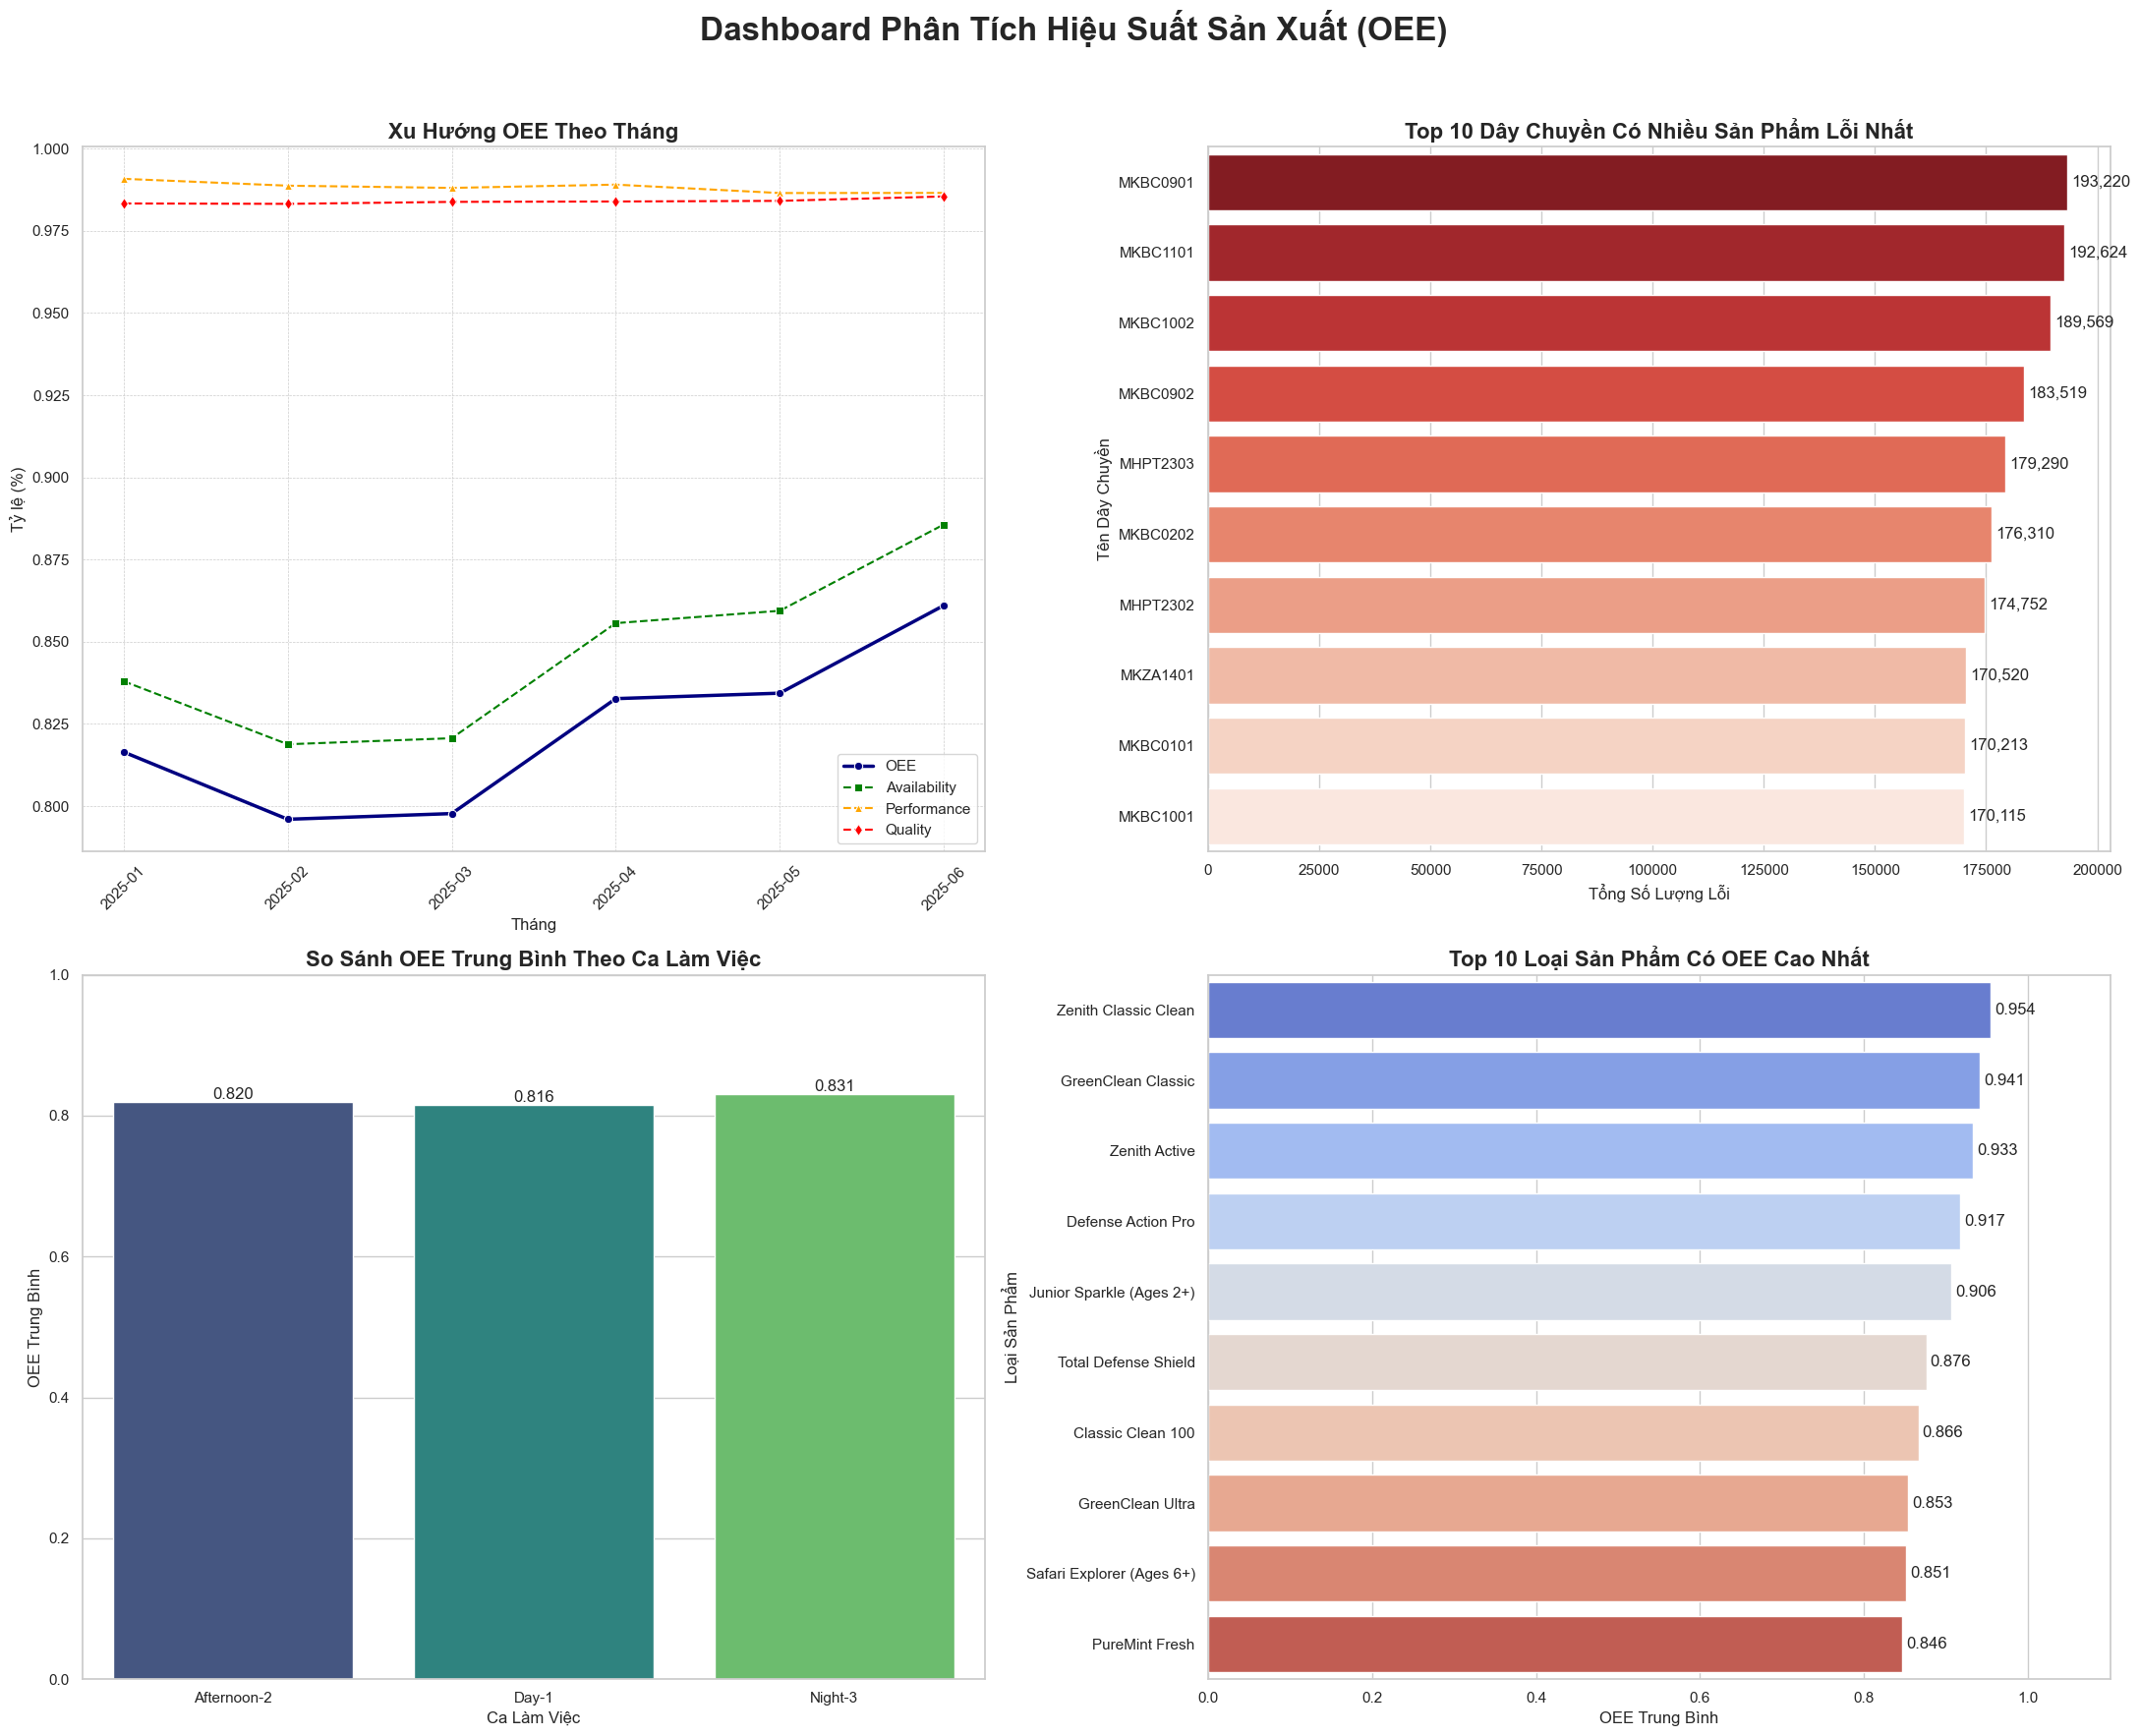

C:\Users\tranb\AppData\Local\Temp\ipykernel_14296\2986997885.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_reject_lines, y='LINE_NAME', x='TOTAL_REJECT_QTY', ax=ax, palette='Reds_r', orient='h', edgecolor='black')


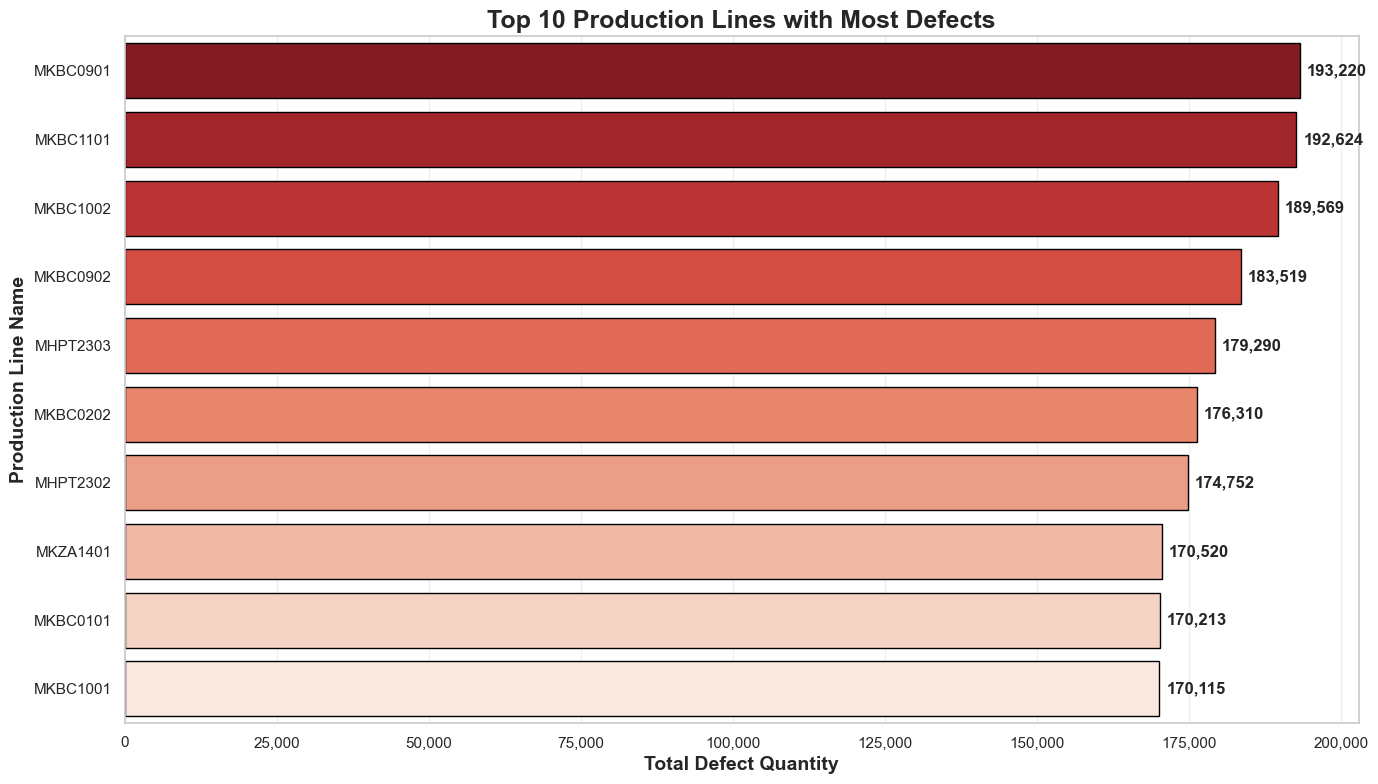

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cài đặt style cho biểu đồ
sns.set_theme(style="whitegrid")

# Tạo một figure lớn chứa nhiều biểu đồ con (subplots)
# 2 hàng, 2 cột
fig, axes = plt.subplots(2, 2, figsize=(22, 18))
fig.suptitle('Dashboard Phân Tích Hiệu Suất Sản Xuất (OEE)', fontsize=24, weight='bold')

# 1. Biểu đồ đường: Xu hướng OEE, Availability, Performance, Quality theo tháng
ax1 = axes[0, 0]
# Chuyển đổi cột MONTH sang string để vẽ biểu đồ
monthly_metrics_plot = monthly_metrics.copy()
monthly_metrics_plot['MONTH'] = monthly_metrics_plot['MONTH'].astype(str)

sns.lineplot(data=monthly_metrics_plot, x='MONTH', y='OEE', ax=ax1, marker='o', label='OEE', color='navy', linewidth=2.5)
sns.lineplot(data=monthly_metrics_plot, x='MONTH', y='Availability', ax=ax1, marker='s', label='Availability', color='green', linestyle='--')
sns.lineplot(data=monthly_metrics_plot, x='MONTH', y='Performance', ax=ax1, marker='^', label='Performance', color='orange', linestyle='--')
sns.lineplot(data=monthly_metrics_plot, x='MONTH', y='Quality', ax=ax1, marker='d', label='Quality', color='red', linestyle='--')

ax1.set_title('Xu Hướng OEE Theo Tháng', fontsize=16, weight='bold')
ax1.set_xlabel('Tháng', fontsize=12)
ax1.set_ylabel('Tỷ lệ (%)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# 2. Biểu đồ cột ngang: Top 10 dây chuyền có sản phẩm lỗi nhiều nhất
ax2 = axes[0, 1]
top_10_reject_lines = total_reject_by_line.head(10)
sns.barplot(data=top_10_reject_lines, y='LINE_NAME', x='TOTAL_REJECT_QTY', ax=ax2, palette='Reds_r', orient='h')

ax2.set_title('Top 10 Dây Chuyền Có Nhiều Sản Phẩm Lỗi Nhất', fontsize=16, weight='bold')
ax2.set_xlabel('Tổng Số Lượng Lỗi', fontsize=12)
ax2.set_ylabel('Tên Dây Chuyền', fontsize=12)
# Thêm giá trị trên các thanh
for container in ax2.containers:
    ax2.bar_label(container, fmt='{:,.0f}', padding=3)


# 3. Biểu đồ cột: So sánh OEE giữa các ca làm việc
ax3 = axes[1, 0]
sns.barplot(data=shift_overall_metrics, x='SHIFT_NAME', y='OEE', ax=ax3, palette='viridis')

ax3.set_title('So Sánh OEE Trung Bình Theo Ca Làm Việc', fontsize=16, weight='bold')
ax3.set_xlabel('Ca Làm Việc', fontsize=12)
ax3.set_ylabel('OEE Trung Bình', fontsize=12)
ax3.set_ylim(0, 1) # OEE là tỷ lệ từ 0 đến 1
# Thêm giá trị trên các cột
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.3f')


# 4. Biểu đồ cột ngang: Top 10 loại sản phẩm có OEE cao nhất
ax4 = axes[1, 1]
# Bỏ qua các giá trị NaN/inf trong OEE và sắp xếp
size_overall_metrics_filtered = size_overall_metrics.replace([np.inf, -np.inf], np.nan).dropna(subset=['OEE'])
top_10_oee_products = size_overall_metrics_filtered.sort_values(by='OEE', ascending=False).head(10)
sns.barplot(data=top_10_oee_products, y='SIZE_TYPE', x='OEE', ax=ax4, palette='coolwarm', orient='h')

ax4.set_title('Top 10 Loại Sản Phẩm Có OEE Cao Nhất', fontsize=16, weight='bold')
ax4.set_xlabel('OEE Trung Bình', fontsize=12)
ax4.set_ylabel('Loại Sản Phẩm', fontsize=12)
ax4.set_xlim(0, 1.1) # OEE là tỷ lệ từ 0 đến 1
# Thêm giá trị trên các thanh
for container in ax4.containers:
    ax4.bar_label(container, fmt='%.3f', padding=3)

# Tự động điều chỉnh layout để không bị chồng chéo
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ============================================================
# CHART: Top 10 Production Lines with Most Defects
# ============================================================

fig, ax = plt.subplots(figsize=(14, 8))

top_10_reject_lines = total_reject_by_line.head(10)
sns.barplot(data=top_10_reject_lines, y='LINE_NAME', x='TOTAL_REJECT_QTY', ax=ax, palette='Reds_r', orient='h', edgecolor='black')

ax.set_title('Top 10 Production Lines with Most Defects', fontsize=18, weight='bold')
ax.set_xlabel('Total Defect Quantity', fontsize=14, weight='bold')
ax.set_ylabel('Production Line Name', fontsize=14, weight='bold')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', padding=5, fontsize=12, weight='bold')

# Format x-axis with thousand separator
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add grid for better readability
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

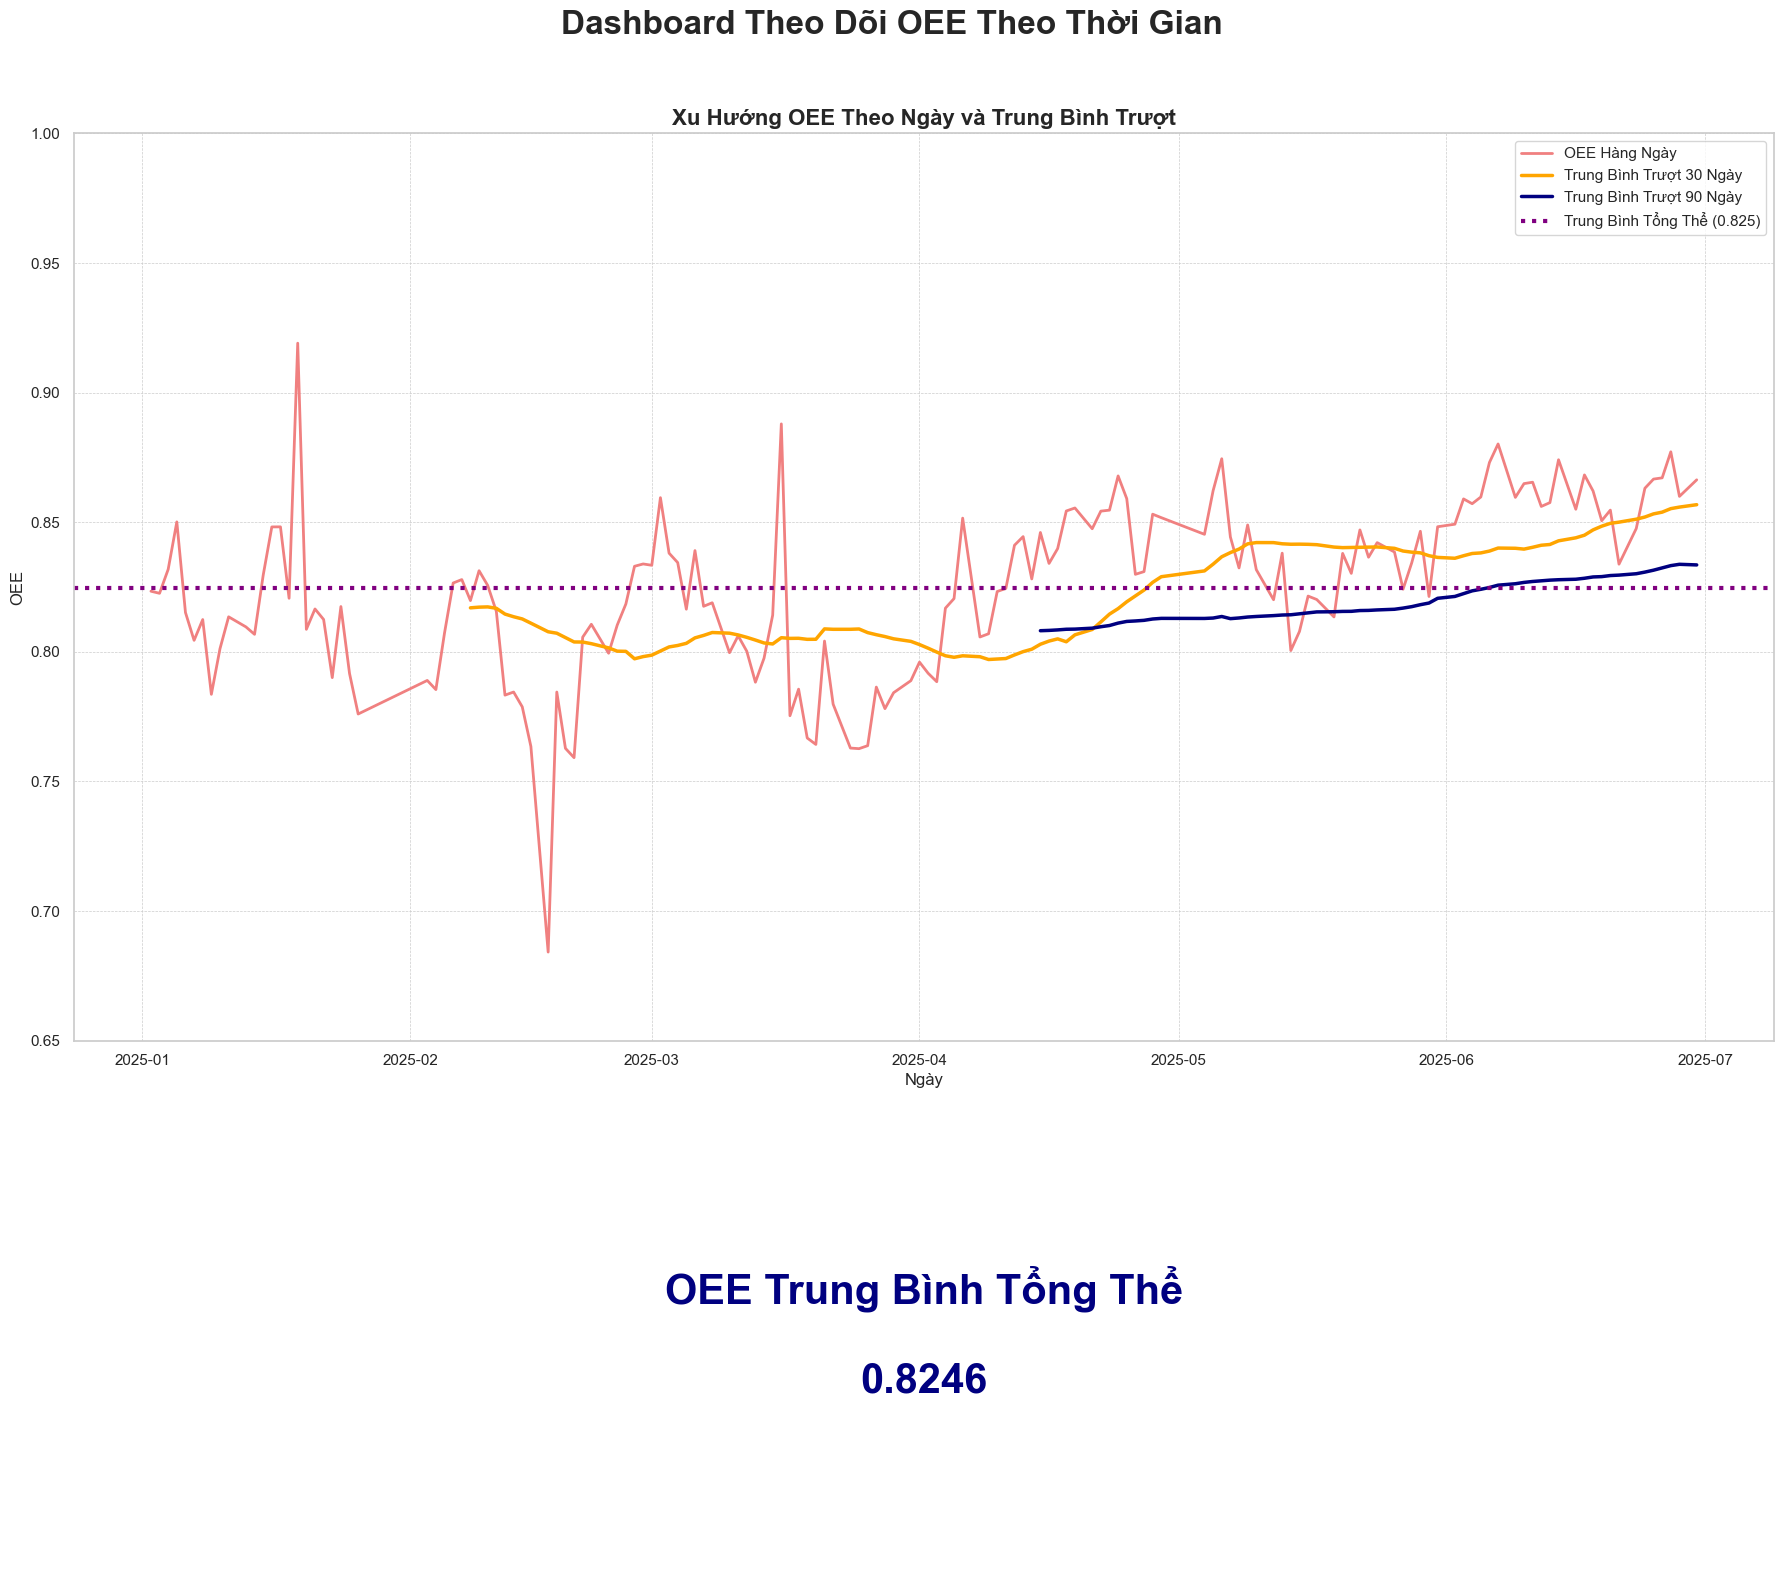

In [ ]:
# Cài đặt style cho biểu đồ
sns.set_theme(style="whitegrid")

# Tạo figure và subplots cho dashboard mới
fig, axes = plt.subplots(2, 1, figsize=(18, 16), gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle('Dashboard Theo Dõi OEE Theo Thời Gian', fontsize=24, weight='bold')

# 1. Biểu đồ đường: Xu hướng OEE theo ngày và đường trung bình trượt (rolling average)
ax1 = axes[0]
# Lọc bỏ các giá trị NaN trong OEE để tính toán không bị lỗi
daily_metrics_filtered = daily_metrics.dropna(subset=['OEE'])

# Vẽ OEE hàng ngày
sns.lineplot(data=daily_metrics_filtered, x='PRODUCTIONDATE_DAY_LOC', y='OEE', ax=ax1, label='OEE Hàng Ngày', color='lightcoral', alpha=1, linewidth=2)

# Tính và vẽ đường trung bình trượt 90 ngày (khoảng 3 tháng)
rolling_30d = daily_metrics_filtered['OEE'].rolling(window=30).mean()
ax1.plot(daily_metrics_filtered['PRODUCTIONDATE_DAY_LOC'], rolling_30d, label='Trung Bình Trượt 30 Ngày', color='orange', linewidth=2.5)

# Tính và vẽ đường trung bình trượt 180 ngày (khoảng 6 tháng)
rolling_90d = daily_metrics_filtered['OEE'].rolling(window=90).mean()
ax1.plot(daily_metrics_filtered['PRODUCTIONDATE_DAY_LOC'], rolling_90d, label='Trung Bình Trượt 90 Ngày', color='navy', linewidth=2.5)

ax1.set_title('Xu Hướng OEE Theo Ngày và Trung Bình Trượt', fontsize=16, weight='bold')
ax1.set_xlabel('Ngày', fontsize=12)
ax1.set_ylabel('OEE', fontsize=12)
ax1.legend()
ax1.set_ylim(0, 1)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax1.set_ylim(0.65, 1)
oee_overall = daily_metrics['OEE'].mean()
# Vẽ đường trung bình tổng thể
ax1.axhline(y=oee_overall, color='purple', linestyle=':', linewidth=3, label=f'Trung Bình Tổng Thể ({oee_overall:.3f})')
ax1.legend() # Cập nhật lại legend để hiển thị đường mới
# 2. Hiển thị OEE trung bình tổng thể
ax2 = axes[1]
oee_overall = daily_metrics['OEE'].mean()

# Ẩn các trục của subplot thứ hai
ax2.axis('off')

# Hiển thị giá trị OEE tổng thể dưới dạng văn bản lớn
ax2.text(0.5, 0.5, f'OEE Trung Bình Tổng Thể\n\n{oee_overall:.4f}',
         ha='center', va='center', fontsize=30, weight='bold', color='navy')

# Tự động điều chỉnh layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

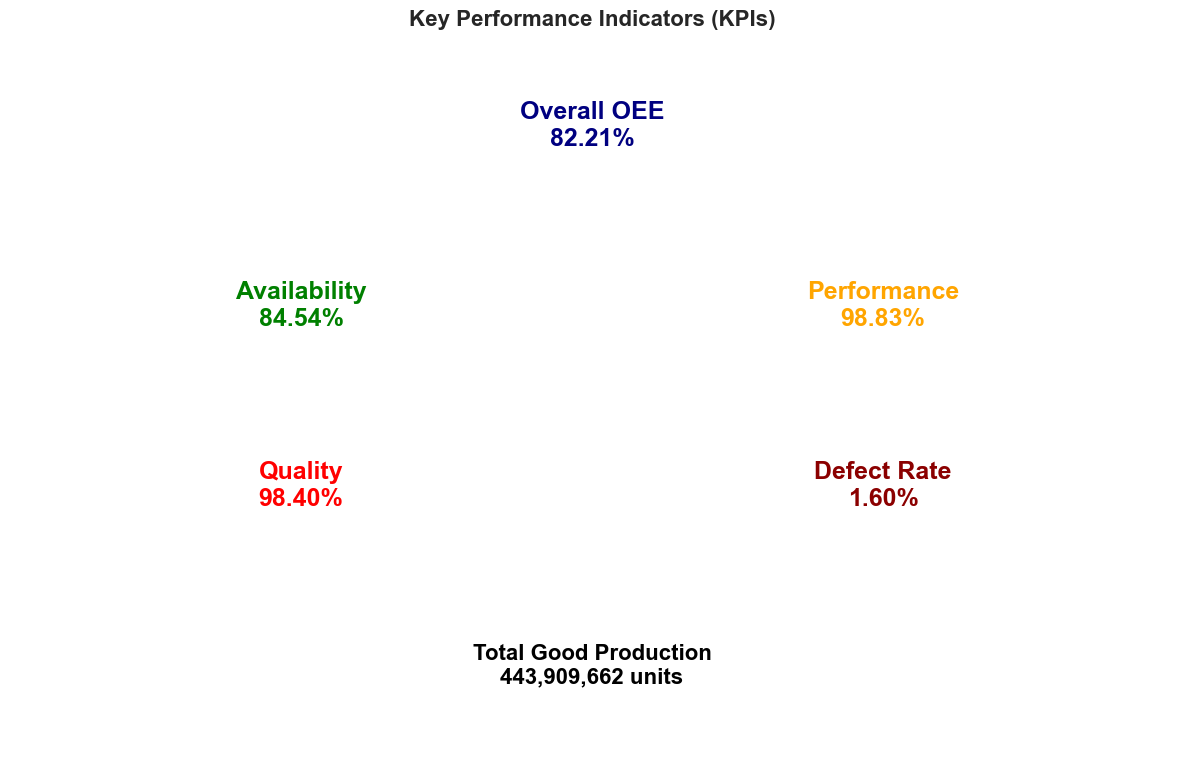

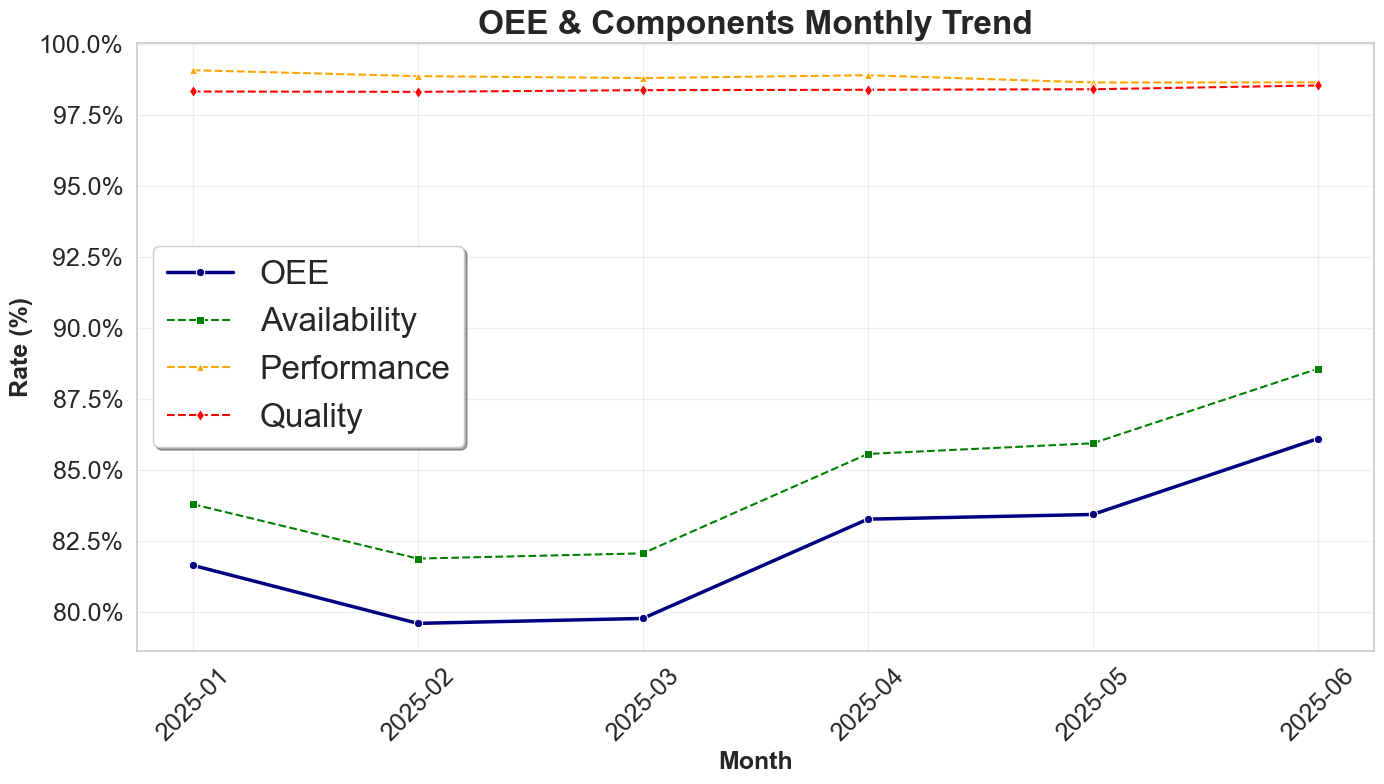

C:\Users\tranb\AppData\Local\Temp\ipykernel_14296\2396848584.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_downtime.index, y=top_10_downtime['DOWNTIME_SUM'], ax=ax_pareto, palette='Blues_r', edgecolor='black')
C:\Users\tranb\AppData\Local\Temp\ipykernel_14296\2396848584.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_pareto.set_xticklabels(ax_pareto.get_xticklabels(), rotation=45, ha='right')


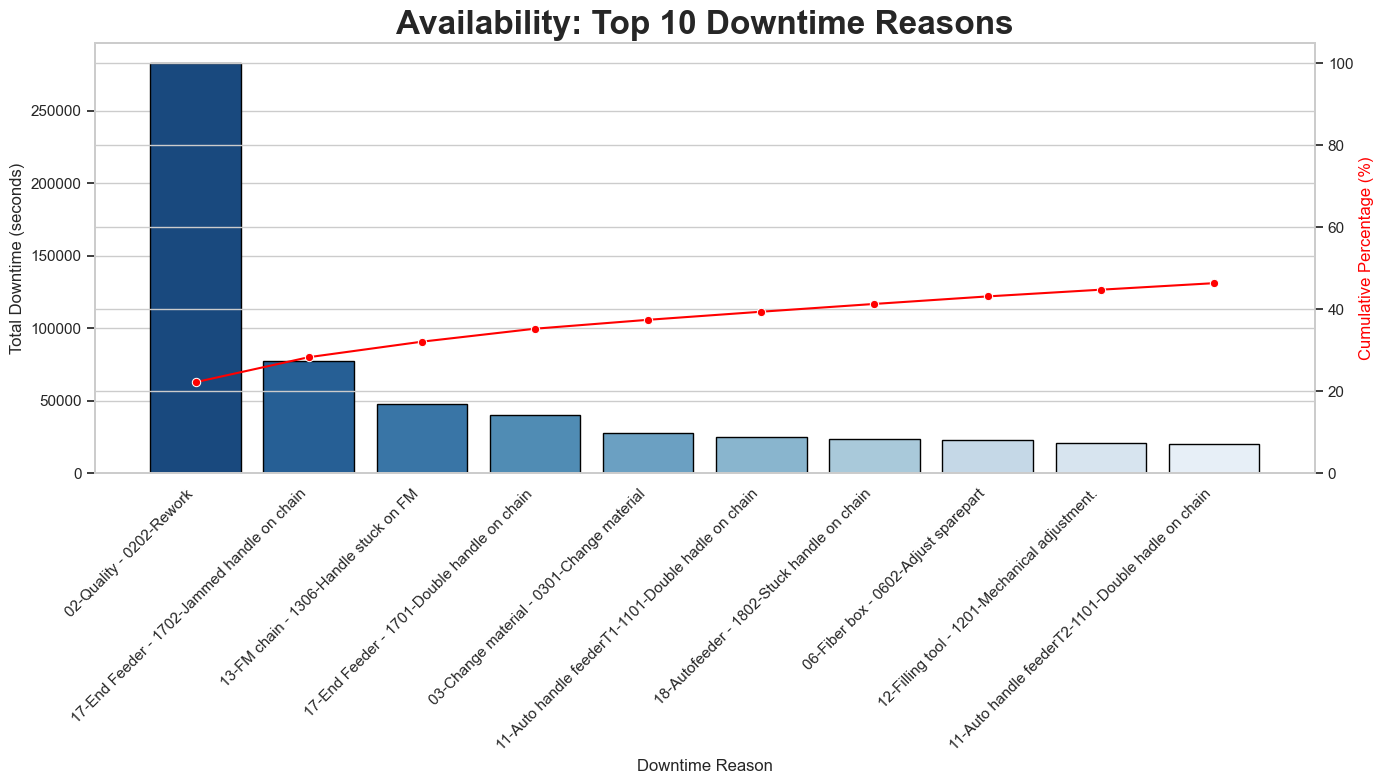

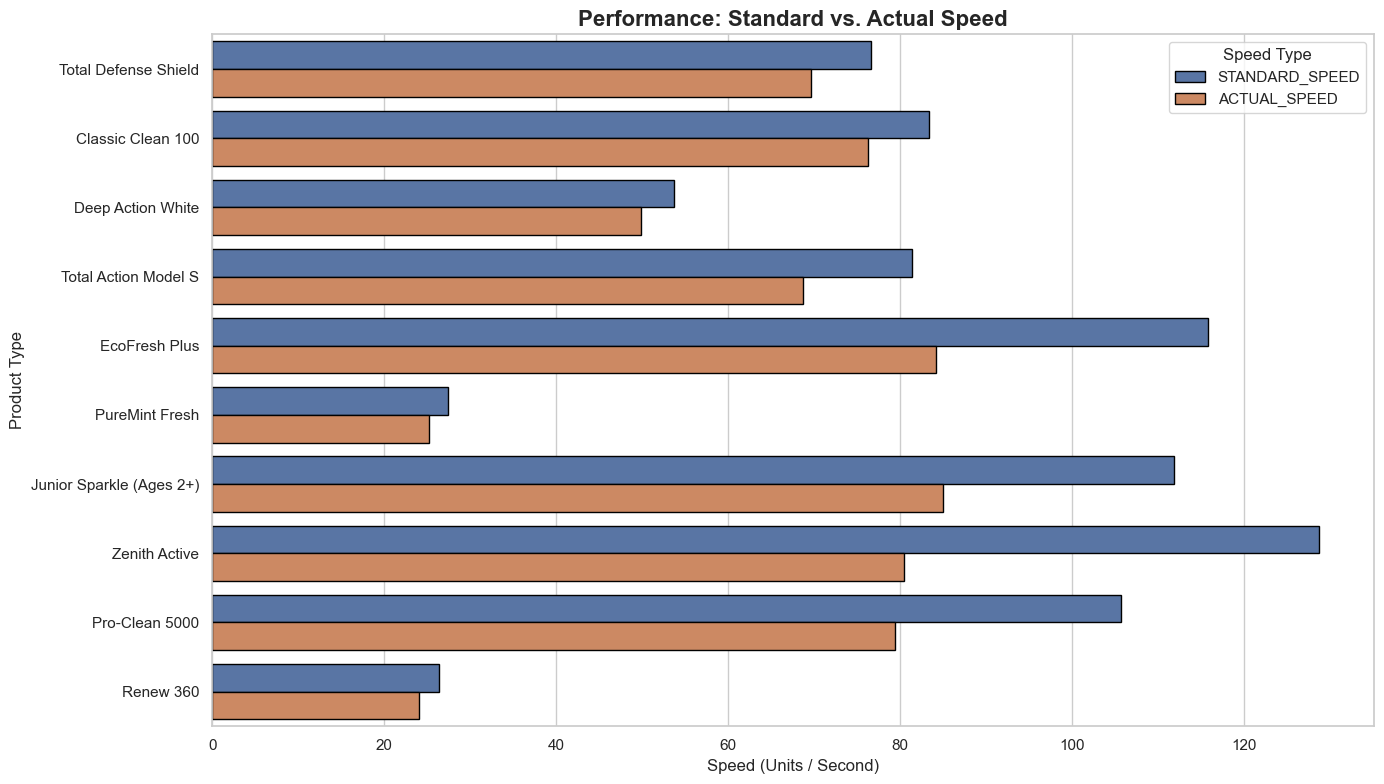

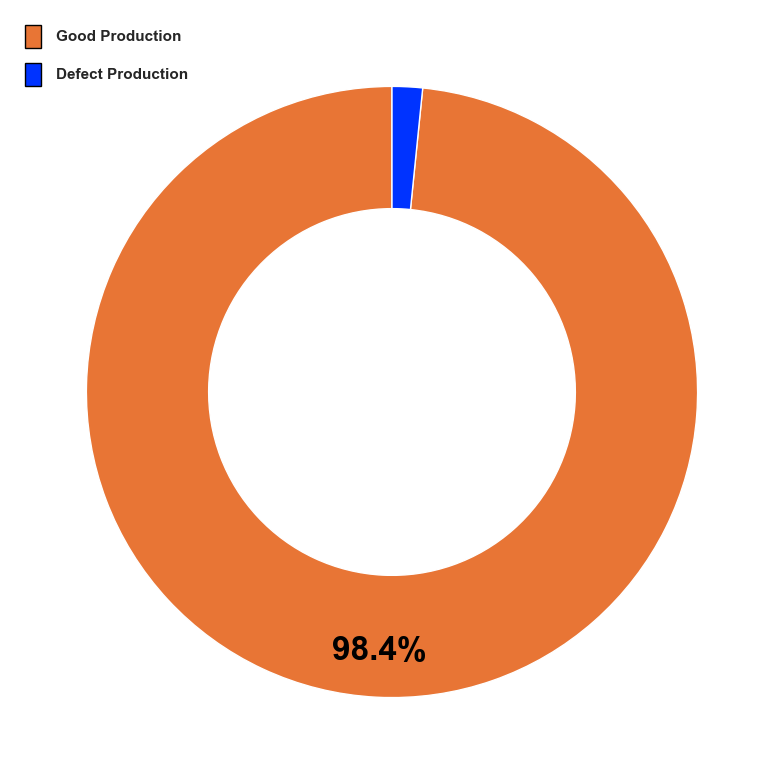

C:\Users\tranb\AppData\Local\Temp\ipykernel_14296\2396848584.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dr_by_product, x='DR', y='SIZE_TYPE', ax=ax_dr, palette='Reds_r', orient='h', edgecolor='black')


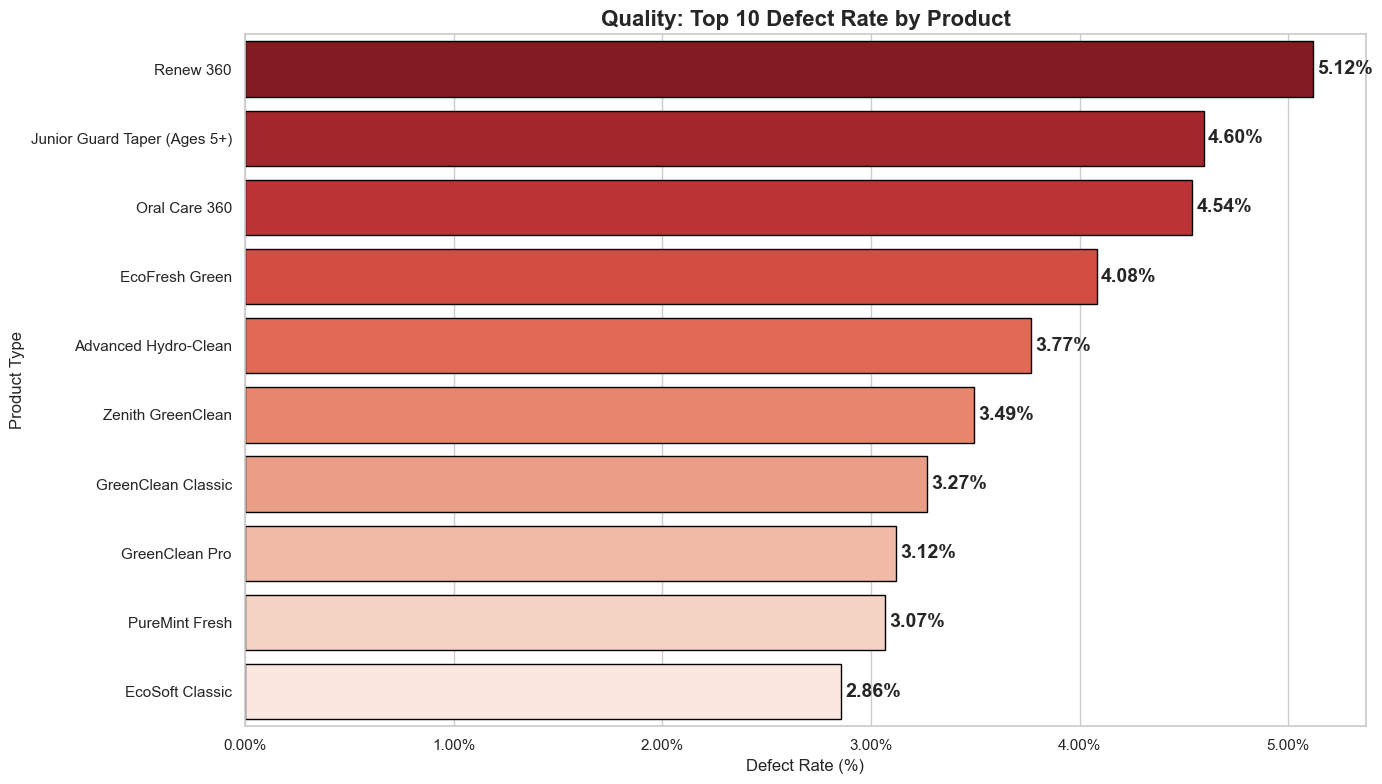

C:\Users\tranb\AppData\Local\Temp\ipykernel_14296\2396848584.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dr_monthly, x='MONTH_STR', y='DR', ax=ax_dr_monthly, palette=colors, edgecolor='black')
C:\Users\tranb\AppData\Local\Temp\ipykernel_14296\2396848584.py:199: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=dr_monthly, x='MONTH_STR', y='DR', ax=ax_dr_monthly, palette=colors, edgecolor='black')


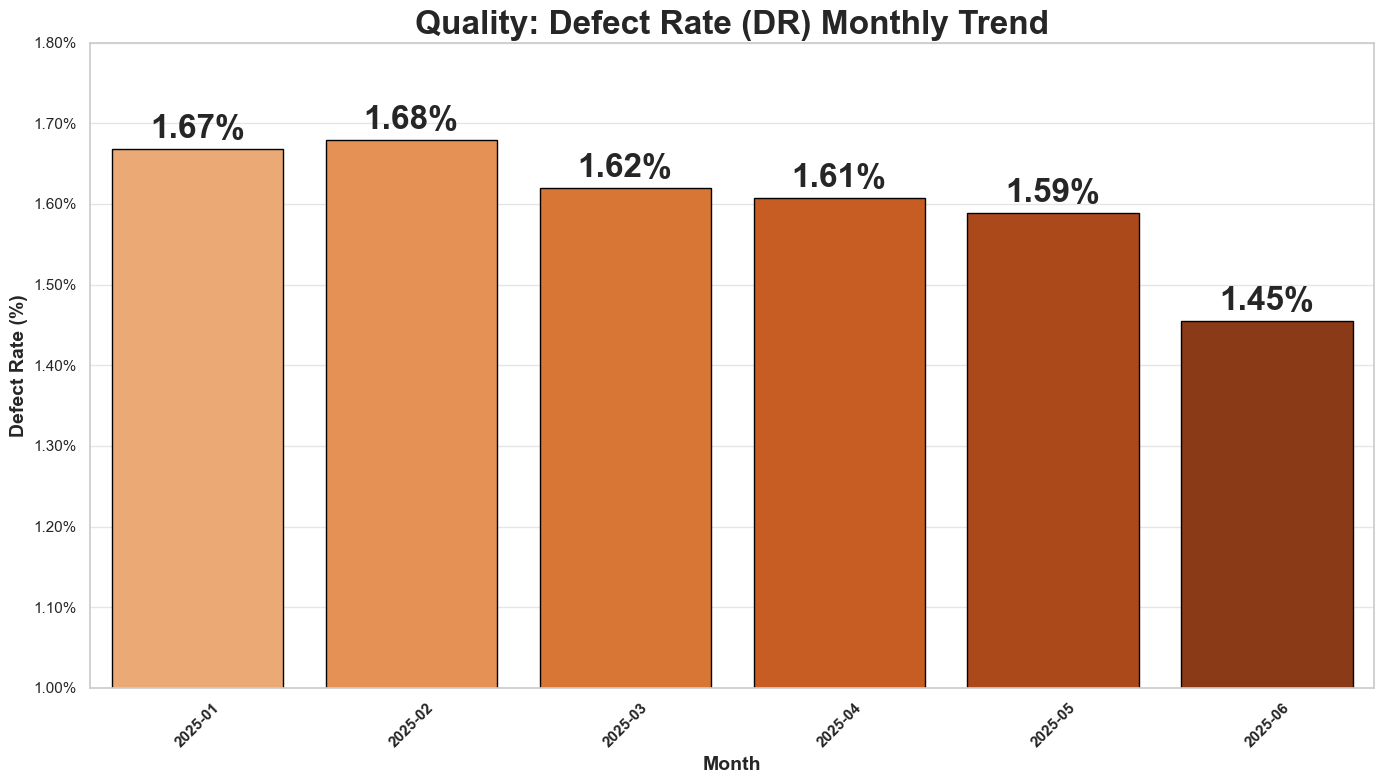

C:\Users\tranb\AppData\Local\Temp\ipykernel_14296\2396848584.py:236: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pty_monthly, x='MONTH_STR', y='PTY', ax=ax_pty, palette=colors, edgecolor='black')
C:\Users\tranb\AppData\Local\Temp\ipykernel_14296\2396848584.py:236: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=pty_monthly, x='MONTH_STR', y='PTY', ax=ax_pty, palette=colors, edgecolor='black')


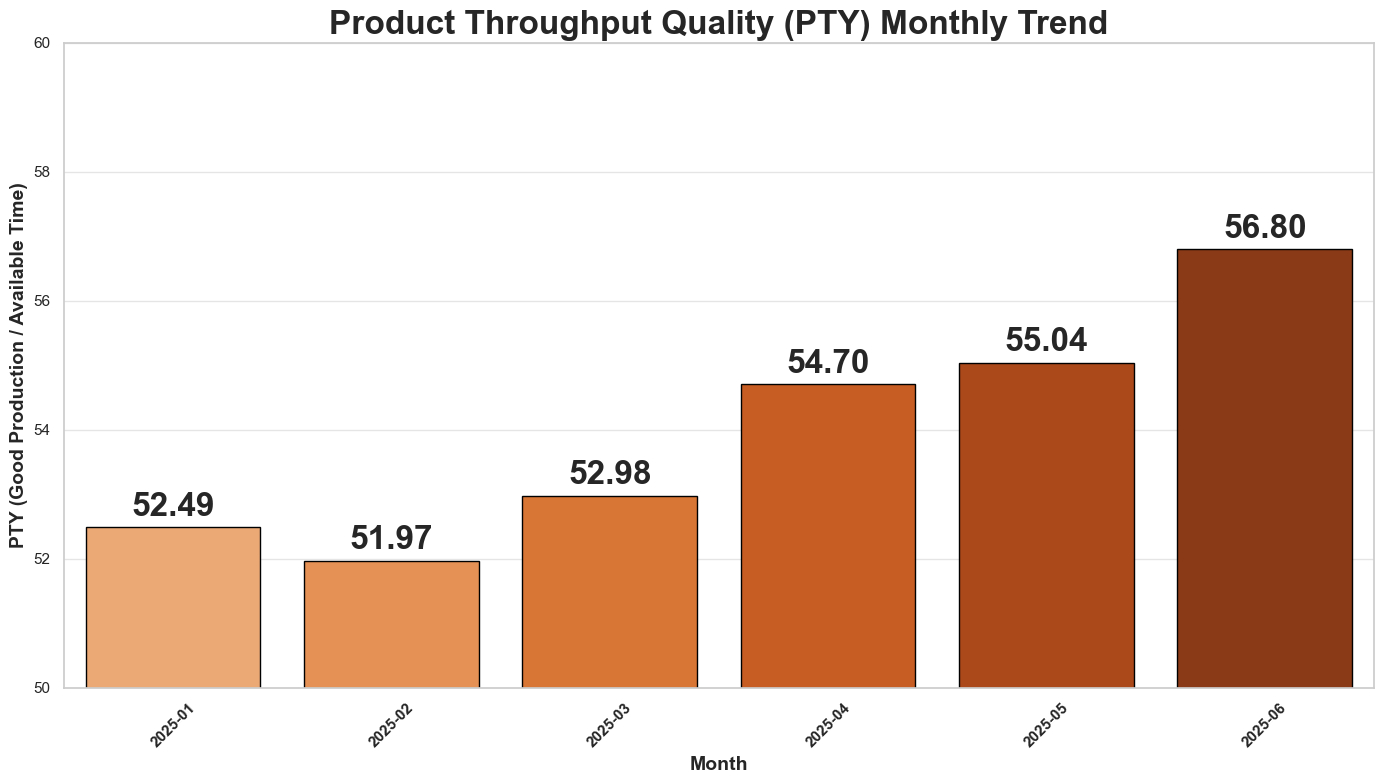

In [ ]:
# 1. Data Preparation for the Dashboard

# Calculate Downtime and group by reason
downtime_reasons = df[df['DOWNTIME'] > 0].groupby('UTIL_REASON_DESCRIPTION')['DOWNTIME'].sum().sort_values(ascending=False)

# Filter out non-downtime entries like 'Running' or NaN
downtime_reasons = downtime_reasons.drop(labels=['Running'], errors='ignore').dropna()

# Prepare data for Pareto chart
downtime_pareto = downtime_reasons.to_frame('DOWNTIME_SUM')
downtime_pareto['CUM_PERCENT'] = (downtime_pareto['DOWNTIME_SUM'].cumsum() / downtime_pareto['DOWNTIME_SUM'].sum()) * 100

# Prepare data for Performance Analysis (Actual vs. Standard Speed)
# Use size_overall_metrics which is already grouped by SIZE_TYPE
perf_analysis_df = size_overall_metrics.copy()
# Calculate Actual Speed. Avoid division by zero.
perf_analysis_df['ACTUAL_SPEED'] = perf_analysis_df['GOOD_PRODUCTION_QTY'] / perf_analysis_df['RUN_TIME'].replace(0, np.nan)
# Rename standard speed column for clarity
perf_analysis_df.rename(columns={'PRODUCTION_ORDER_RATE': 'STANDARD_SPEED'}, inplace=True)
# Select top 10 products by run time for a cleaner chart
perf_analysis_df = perf_analysis_df.sort_values(by='RUN_TIME', ascending=False).head(10)


# ============================================================
# CHART 1: KPI Scorecards
# ============================================================

sns.set_theme(style="whitegrid")
fig, ax_kpi = plt.subplots(figsize=(12, 8))
ax_kpi.axis('off')
kpi_text_props = {'ha': 'center', 'va': 'center', 'fontsize': 18, 'weight': 'bold'}

ax_kpi.text(0.5, 0.9, f'Overall OEE\n{overall_oee:.2%}', **kpi_text_props, color='navy')
ax_kpi.text(0.25, 0.65, f'Availability\n{overall_availability:.2%}', **kpi_text_props, color='green')
ax_kpi.text(0.75, 0.65, f'Performance\n{overall_performance:.2%}', **kpi_text_props, color='orange')
ax_kpi.text(0.25, 0.4, f'Quality\n{overall_quality:.2%}', **kpi_text_props, color='red')
ax_kpi.text(0.75, 0.4, f'Defect Rate\n{overall_dr:.2%}', **kpi_text_props, color='darkred')
ax_kpi.text(0.5, 0.15, f'Total Good Production\n{total_good_qty:,.0f} units',
            ha='center', va='center', fontsize=16, weight='bold', color='black')
ax_kpi.set_title('Key Performance Indicators (KPIs)', fontsize=16, weight='bold', pad=20)

plt.tight_layout()
plt.show()


# ============================================================
# CHART 2: OEE Components Monthly Trend
# ============================================================

fig, ax_trend = plt.subplots(figsize=(14, 8))

# Prepare data for plotting, converting rates to percentages
monthly_metrics_plot = monthly_metrics.copy()
monthly_metrics_plot['MONTH_STR'] = monthly_metrics_plot['MONTH'].astype(str)
for col in ['OEE', 'Availability', 'Performance', 'Quality']:
    monthly_metrics_plot[col] = monthly_metrics_plot[col] * 100

# Plotting the trends
sns.lineplot(data=monthly_metrics_plot, x='MONTH_STR', y='OEE', ax=ax_trend, marker='o', label='OEE', color='navy', lw=2.5)
sns.lineplot(data=monthly_metrics_plot, x='MONTH_STR', y='Availability', ax=ax_trend, marker='s', label='Availability', color='green', ls='--')
sns.lineplot(data=monthly_metrics_plot, x='MONTH_STR', y='Performance', ax=ax_trend, marker='^', label='Performance', color='orange', ls='--')
sns.lineplot(data=monthly_metrics_plot, x='MONTH_STR', y='Quality', ax=ax_trend, marker='d', label='Quality', color='red', ls='--')

# Formatting the plot
ax_trend.set_title('OEE & Components Monthly Trend', fontsize=24, weight='bold')
ax_trend.set_xlabel('Month', fontsize=18, weight='bold')
ax_trend.set_ylabel('Rate (%)', fontsize=18, weight='bold')
ax_trend.tick_params(axis='x', rotation=45, labelsize=18)
ax_trend.tick_params(axis='y', labelsize=18)
ax_trend.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
ax_trend.legend(fontsize=24, frameon=True, fancybox=True, shadow=True)
ax_trend.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ============================================================
# CHART 3: Downtime Pareto Chart
# ============================================================

fig, ax_pareto = plt.subplots(figsize=(14, 8))
ax_pareto_twin = ax_pareto.twinx()
top_10_downtime = downtime_pareto.head(10)

sns.barplot(x=top_10_downtime.index, y=top_10_downtime['DOWNTIME_SUM'], ax=ax_pareto, palette='Blues_r', edgecolor='black')
ax_pareto.set_title('Availability: Top 10 Downtime Reasons', fontsize=24, weight='bold')
ax_pareto.set_xlabel('Downtime Reason', fontsize=12)
ax_pareto.set_ylabel('Total Downtime (seconds)', fontsize=12)
ax_pareto.set_xticklabels(ax_pareto.get_xticklabels(), rotation=45, ha='right')

sns.lineplot(x=top_10_downtime.index, y=top_10_downtime['CUM_PERCENT'], ax=ax_pareto_twin, color='red', marker='o', sort=False)
ax_pareto_twin.set_ylabel('Cumulative Percentage (%)', fontsize=12, color='red')
ax_pareto_twin.set_ylim(0, 105)

plt.tight_layout()
plt.show()


# ============================================================
# CHART 4: Performance - Standard vs. Actual Speed
# ============================================================

fig, ax_perf = plt.subplots(figsize=(14, 8))

perf_analysis_df_melted = perf_analysis_df.reset_index().melt(
    id_vars='SIZE_TYPE',
    value_vars=['STANDARD_SPEED', 'ACTUAL_SPEED'],
    var_name='Speed Type',
    value_name='Speed'
)
sns.barplot(data=perf_analysis_df_melted, x='Speed', y='SIZE_TYPE', hue='Speed Type', ax=ax_perf, orient='h', edgecolor='black')
ax_perf.set_title('Performance: Standard vs. Actual Speed', fontsize=16, weight='bold')
ax_perf.set_xlabel('Speed (Units / Second)', fontsize=12)
ax_perf.set_ylabel('Product Type', fontsize=12)
ax_perf.legend(title='Speed Type')

plt.tight_layout()
plt.show()


# ============================================================
# CHART 5: Quality - Good vs. Reject Ratio (Donut Chart)
# ============================================================

fig, ax_donut = plt.subplots(figsize=(10, 8))

quality_data = [total_good_qty, total_reject_qty]
quality_labels = ['Good Production', 'Defect Production']
quality_colors = ['#E87535', '#0033ff']

# Add color boxes to distinguish labels
for i, (label, color) in enumerate(zip(quality_labels, quality_colors)):
    ax_donut.add_patch(plt.Rectangle((0.02, 0.95 - i*0.05), 0.02, 0.03,
                                      transform=ax_donut.transAxes,
                                      facecolor=color, edgecolor='black', linewidth=1))
    ax_donut.text(0.06, 0.965 - i*0.05, label, transform=ax_donut.transAxes,
                  fontsize=11, va='center', weight='bold')


# Create the pie chart and get the wedges and text elements
wedges, texts, autotexts = ax_donut.pie(
    quality_data,
    autopct='%1.1f%%',
    startangle=90,
    colors=quality_colors,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    pctdistance=0.85,
    textprops={'fontsize': 12}
)

# Make the percentage text bold and white for better contrast, but only for the larger segment
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')
    autotext.set_weight('bold')
    autotext.set_fontsize(24)
    # Hide text for the smaller segment (Defect Production)
    if i == 1:  # Second segment is smaller
        autotext.set_visible(False)

plt.tight_layout()
plt.show()

# ============================================================
# CHART 6: Defect Rate by Product
# ============================================================

fig, ax_dr = plt.subplots(figsize=(14, 8))

dr_by_product = size_overall_metrics.sort_values('DR', ascending=False).head(10)
sns.barplot(data=dr_by_product, x='DR', y='SIZE_TYPE', ax=ax_dr, palette='Reds_r', orient='h', edgecolor='black')
ax_dr.set_title('Quality: Top 10 Defect Rate by Product', fontsize=16, weight='bold')
ax_dr.set_xlabel('Defect Rate (%)', fontsize=12)
ax_dr.set_ylabel('Product Type', fontsize=12)
ax_dr.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2%}'))

# Add value labels on bars - FIX: Nhân với 100 để convert từ decimal sang phần trăm
for container in ax_dr.containers:
    ax_dr.bar_label(container, fmt=lambda x: f'{x*100:.2f}%', padding=3, fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


# ============================================================
# CHART 6B: Defect Rate Monthly Trend
# ============================================================

fig, ax_dr_monthly = plt.subplots(figsize=(14, 8))

# Prepare data for DR monthly trend
dr_monthly = monthly_metrics.copy()
dr_monthly['MONTH_STR'] = dr_monthly['MONTH'].astype(str)
dr_monthly = dr_monthly.sort_values('MONTH_STR')

# Create color gradient (red to dark red)
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(dr_monthly)))

sns.barplot(data=dr_monthly, x='MONTH_STR', y='DR', ax=ax_dr_monthly, palette=colors, edgecolor='black')
ax_dr_monthly.set_title('Quality: Defect Rate (DR) Monthly Trend', fontsize=24, weight='bold', family='sans-serif')
ax_dr_monthly.set_xlabel('Month', fontsize=14, family='sans-serif', weight='bold')
ax_dr_monthly.set_ylabel('Defect Rate (%)', fontsize=14, family='sans-serif', weight='bold')
ax_dr_monthly.tick_params(axis='x', rotation=45)

# Add value labels on bars as percentages
for container in ax_dr_monthly.containers:
    ax_dr_monthly.bar_label(container, fmt=lambda x: f'{x:.2%}', padding=3, family='sans-serif', fontsize=24, weight='bold')

# Format y-axis as percentage
ax_dr_monthly.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2%}'))

# Make x-axis tick labels bold
for label in ax_dr_monthly.get_xticklabels():
    label.set_weight('bold')

ax_dr_monthly.grid(True, alpha=0.5, axis='y')
ax_dr_monthly.set_ylim(0.01, 0.018)
plt.tight_layout()
plt.show()


# ============================================================
# CHART 7: Product Throughput Quality (PTY) Monthly Trend
# ============================================================

fig, ax_pty = plt.subplots(figsize=(14, 8))

# Prepare data for PTY monthly trend
pty_monthly = monthly_metrics.copy()
pty_monthly['MONTH_STR'] = pty_monthly['MONTH'].astype(str)
pty_monthly = pty_monthly.sort_values('MONTH_STR')

# Create color gradient (orange to deep orange)
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(pty_monthly)))

sns.barplot(data=pty_monthly, x='MONTH_STR', y='PTY', ax=ax_pty, palette=colors, edgecolor='black')
ax_pty.set_title('Product Throughput Quality (PTY) Monthly Trend', fontsize=24, weight='bold', family='sans-serif')
ax_pty.set_xlabel('Month', fontsize=14, family='sans-serif', weight='bold')
ax_pty.set_ylabel('PTY (Good Production / Available Time)', fontsize=14, family='sans-serif', weight='bold')
ax_pty.tick_params(axis='x', rotation=45)
ax_pty.set_ylim(50, 60)

# Add value labels on bars
for container in ax_pty.containers:
    ax_pty.bar_label(container, fmt='%.2f', padding=3, family='sans-serif', fontsize=24, weight='bold')

# Make x-axis tick labels bold
for label in ax_pty.get_xticklabels():
    label.set_weight('bold')

ax_pty.grid(True, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()




Tổng lỗ hàng tháng 3: 22,039,661 sản phẩm
Tổng lỗ hàng tháng 6: 12,298,632 sản phẩm
Giảm: 44.20%


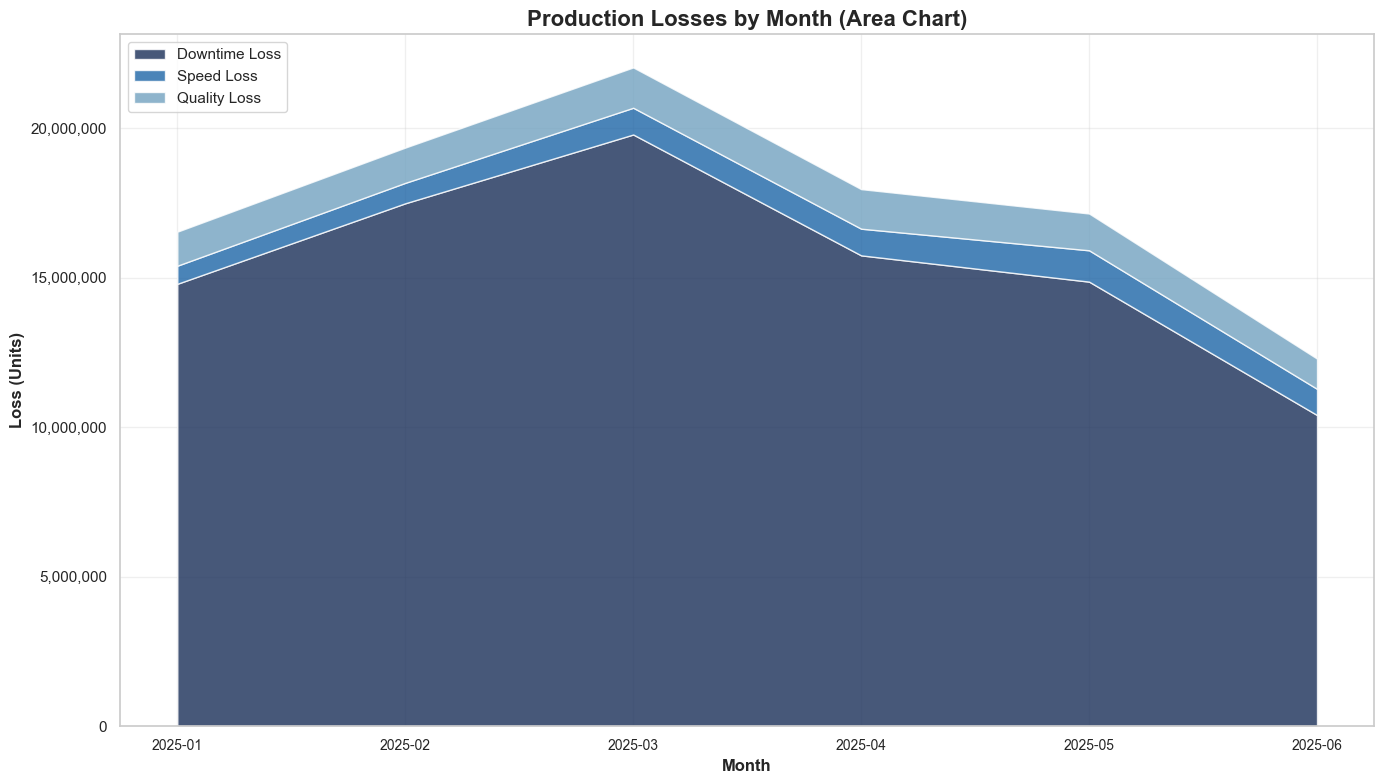

In [ ]:
# Calculate losses by SIZE_TYPE and MONTH
loss_by_product_month = size_monthly_metrics.copy()

# Calculate losses (units lost due to each factor)
# Using PRODUCTION_ORDER_RATE as the standard speed
loss_by_product_month['Downtime_Loss'] = (
    loss_by_product_month['PRODUCTION_AVAILABLE_TIME'] - loss_by_product_month['RUN_TIME']
) * loss_by_product_month['PRODUCTION_ORDER_RATE']

loss_by_product_month['Speed_Loss'] = (
    loss_by_product_month['RUN_TIME'] - loss_by_product_month['EFFECTIVE_RUNTIME']
) * loss_by_product_month['PRODUCTION_ORDER_RATE']

loss_by_product_month['Quality_Loss'] = loss_by_product_month['REJECT_PRODUCTION_QTY']

# Convert MONTH to string for plotting
loss_by_product_month['MONTH_STR'] = loss_by_product_month['MONTH'].astype(str)

# Aggregate losses by month (across all products)
loss_by_month = loss_by_product_month.groupby('MONTH_STR')[['Downtime_Loss', 'Speed_Loss', 'Quality_Loss']].sum().reset_index()
# Calculate percentage change in losses from March to June
loss_march = loss_by_month[loss_by_month['MONTH_STR'] == '2025-03'][['Downtime_Loss', 'Speed_Loss', 'Quality_Loss']].sum(axis=1).values[0]
loss_june = loss_by_month[loss_by_month['MONTH_STR'] == '2025-06'][['Downtime_Loss', 'Speed_Loss', 'Quality_Loss']].sum(axis=1).values[0]

percent_change = ((loss_march - loss_june) / loss_march) * 100

print(f"Tổng lỗ hàng tháng 3: {loss_march:,.0f} sản phẩm")
print(f"Tổng lỗ hàng tháng 6: {loss_june:,.0f} sản phẩm")
print(f"Giảm: {percent_change:.2f}%")
# Create area chart
fig, ax = plt.subplots(figsize=(14, 8))

ax.stackplot(
    range(len(loss_by_month)),
    loss_by_month['Downtime_Loss'],
    loss_by_month['Speed_Loss'],
    loss_by_month['Quality_Loss'],
    labels=['Downtime Loss', 'Speed Loss', 'Quality Loss'],
    colors=['#192E58', '#1D65A6', "#72A2C0"],


    alpha=0.8
)

ax.set_xlabel('Month', fontsize=12, weight='bold')
ax.set_ylabel('Loss (Units)', fontsize=12, weight='bold')
ax.set_title('Production Losses by Month (Area Chart)', fontsize=16, weight='bold')
ax.set_xticks(range(len(loss_by_month)))
ax.set_xticklabels(loss_by_month['MONTH_STR'].values, fontsize=10)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# --- 1. Tính toán tổng thể ---
print("="*20 + " Tác Động Kinh Doanh Toàn Nhà Máy " + "="*20)

# Tổn thất Dừng máy (Units)
# Nhân từng dòng rồi mới sum để đảm bảo tính đúng rate của từng order
downtime_loss_total = (df['DOWNTIME'] * df['PRODUCTION_ORDER_RATE']).sum()
print(f"Tổn thất Dừng máy (Downtime Loss): {downtime_loss_total:,.0f} Units")
# Tổn thất Dừng máy do Unplanned (Units)
downtime_loss_unplanned = (df[df['AE_MODEL_CATEGORY'] == 'Unplanned']['DOWNTIME'] * df[df['AE_MODEL_CATEGORY'] == 'Unplanned']['PRODUCTION_ORDER_RATE']).sum()
print(f"Tổn thất Dừng máy Unplanned (Downtime Loss - Unplanned): {downtime_loss_unplanned:,.0f} Units")


# Sản lượng tiềm năng từ Planned Downtime Loss
potential_production_planned = downtime_loss_planned
print(f"Sản lượng tiềm năng có thể sản xuất được (Planned Downtime): {potential_production_planned:,.0f} Units")

# Tổn thất Chạy chậm (Units)
avg_rate_overall = df['PRODUCTION_ORDER_RATE'].mean()
speed_loss_total = (df['RUN_TIME'].sum() - df['EFFECTIVE_RUNTIME'].sum()) * avg_rate_overall
print(f"Tổn thất Chạy chậm (Speed Loss): {speed_loss_total:,.0f} Units")

# Tổn thất Chất lượng (Units)
quality_loss_total = df['REJECT_PRODUCTION_QTY'].sum()
print(f"Tổn thất Chất lượng (Quality Loss): {quality_loss_total:,.0f} Units")

# Tổng Sản lượng Tiềm năng
total_loss = downtime_loss_total + speed_loss_total + quality_loss_total
print(f"-------------------------------------------------------------")
print(f"Tổng Tổn Thất: {total_loss:,.0f} Units")
print("\n")


# --- 2. Tính toán và phân tích theo SIZE_TYPE ---
print("="*20 + " Phân Tích Tác Động Theo Loại Sản Phẩm (SIZE_TYPE) " + "="*20)

# Tạo cột tạm để tính tổn thất dừng máy theo đơn vị sản phẩm
df_temp = df.copy()
df_temp['DOWNTIME_LOSS_UNITS'] = df_temp['DOWNTIME'] * df_temp['PRODUCTION_ORDER_RATE']

# Nhóm theo SIZE_TYPE và tính toán các chỉ số
impact_by_size = df_temp.groupby('SIZE_TYPE').agg(
    Quality_Loss=('REJECT_PRODUCTION_QTY', 'sum'),
    Downtime_Loss=('DOWNTIME_LOSS_UNITS', 'sum'),
    run_time_sum=('RUN_TIME', 'sum'),
    effective_runtime_sum=('EFFECTIVE_RUNTIME', 'sum'),
    avg_rate=('PRODUCTION_ORDER_RATE', 'mean')
).reset_index()

# Tính tổn thất chạy chậm
impact_by_size['Speed_Loss'] = (impact_by_size['run_time_sum'] - impact_by_size['effective_runtime_sum']) * impact_by_size['avg_rate']

# Tính tổng tổn thất
impact_by_size['Total_Loss'] = impact_by_size['Quality_Loss'] + impact_by_size['Downtime_Loss'] + impact_by_size['Speed_Loss']

# Chọn các cột cần thiết để hiển thị và vẽ biểu đồ
analysis_cols = ['SIZE_TYPE', 'Downtime_Loss', 'Speed_Loss', 'Quality_Loss', 'Total_Loss']
impact_analysis = impact_by_size[analysis_cols].copy()

# Xác định sản phẩm có tổn thất chất lượng cao nhất
most_reject_product = impact_analysis.sort_values(by='Quality_Loss', ascending=False).iloc[0]
print(f"Sản phẩm có tổn thất chất lượng (hàng lỗi) nhiều nhất:")
print(f"-> Tên: {most_reject_product['SIZE_TYPE']}")
print(f"-> Số lượng lỗi: {most_reject_product['Quality_Loss']:,.0f} Units\n")


# --- 3. Vẽ biểu đồ ---

# Chuẩn bị dữ liệu cho biểu đồ (melt dataframe)
# Sắp xếp theo tổng tổn thất để biểu đồ dễ nhìn hơn
impact_analysis_sorted = impact_analysis.sort_values('Total_Loss', ascending=False).head(15) # Lấy top 15 cho dễ nhìn

melted_data = impact_analysis_sorted.melt(
    id_vars='SIZE_TYPE',
    value_vars=['Downtime_Loss', 'Speed_Loss', 'Quality_Loss'],
    var_name='Metric',
    value_name='Value'
)

# Vẽ biểu đồ cột chồng
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 12))

sns.barplot(
    data=melted_data,
    y='SIZE_TYPE',
    x='Value',
    hue='Metric',
    orient='h',
    dodge=False, # Set dodge=False for stacked bars
    ax=ax,
    palette={'Downtime_Loss': 'orange', 'Speed_Loss': 'skyblue', 'Quality_Loss': 'red'}
)

ax.set_xlabel('UNITS', fontsize=14)
ax.set_ylabel('PRODUCT_TYPE', fontsize=14)
ax.legend(title='LOSS_TYPE', loc='lower right')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}')) # Format x-axis labels

plt.tight_layout()
plt.show()


==================== Tác Động Kinh Doanh Toàn Nhà Máy ====================
Tổn thất Dừng máy (Downtime Loss): 80,495,591 Units
Tổn thất Dừng máy Unplanned (Downtime Loss - Unplanned): 80,495,591 Units


NameError: name 'downtime_loss_planned' is not defined